# Declaration of Originality

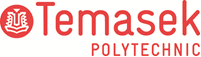

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Myat Phone Myint (2403584B)
* Tutorial Group                : P04 
* Tutor						    : Emile Sabastian 
* Submission Date               : 12/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: Build a supervised machine learning model that predicts whether a telecom customer will churn (leave the service) based on customer demographics, subscribed services, and billing/contract information, so that the company can proactively identify at-risk customers and apply retention strategies to reduce churn.

# 2. Data Understanding

## 2.1 Load dataset

In [142]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv('Telco-Customer-Churn.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Interpretation
- Dataset contains 7,043 customer records
- 21 features including the target variable 'Churn'
- Data appears well-structured with no obvious formatting issues
- Mix of categorical and numerical features

### Initial Observation
- customerID: Unique identifier (This column will be dropped during preprocessing)
- Target variable: Churn (Yes/No)
- Features include demographics, services, account info, and charges

## 2.2 Summary Statistics

In [143]:
## Understand the type of variable for each column
# Check data types and non-null counts
print("="*70)
print("DATASET INFORMATION")
print("="*70)
df.info()
print("="*70)

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

In [144]:
# Check for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Insight: No traditional missing values (NaN) are detected. However, TotalCharges is stored as 'object' type instead of numeric. This suggests possible data quality issues (e.g., spaces or empty strings).

In [145]:
# Check for empty strings or spaces in TotalCharges
print("\n" + "="*70)
print("DATA TYPE INVESTIGATION: TotalCharges")
print("="*70)
print(f"TotalCharges data type: {df['TotalCharges'].dtype}")
print(f"Sample values: {df['TotalCharges'].head(10).tolist()}") # get first 10 values


DATA TYPE INVESTIGATION: TotalCharges
TotalCharges data type: object
Sample values: ['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95']


In [146]:
# Check for non-numeric values
non_numeric = df[df['TotalCharges'].str.strip() == ''] # rows where TotalCharges is empty or space
print(f"\nEmpty/Space values in TotalCharges: {len(non_numeric)}")

if len(non_numeric) > 0:
    print("\nRecords with empty TotalCharges:")
    print(non_numeric[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())
    
print("="*70)


Empty/Space values in TotalCharges: 11

Records with empty TotalCharges:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             


Insights: 
- TotalCharges contains 11 empty string values (spaces)
- These correspond to customers with 0 tenure (just signed up)
- Empty values make sense: new customers haven't accumulated charges yet

In [147]:
# Numerical Features Summary
print("\n" + "="*70)
print("NUMERICAL FEATURES SUMMARY STATISTICS")
print("="*70)

# Convert TotalCharges to numeric for analysis
df_temp = df.copy()
df_temp['TotalCharges'] = pd.to_numeric(df_temp['TotalCharges'], errors='coerce')

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
print(df_temp[numerical_cols].describe())
print("="*70)


NUMERICAL FEATURES SUMMARY STATISTICS
            tenure  MonthlyCharges  TotalCharges  SeniorCitizen
count  7043.000000     7043.000000   7032.000000    7043.000000
mean     32.371149       64.761692   2283.300441       0.162147
std      24.559481       30.090047   2266.771362       0.368612
min       0.000000       18.250000     18.800000       0.000000
25%       9.000000       35.500000    401.450000       0.000000
50%      29.000000       70.350000   1397.475000       0.000000
75%      55.000000       89.850000   3794.737500       0.000000
max      72.000000      118.750000   8684.800000       1.000000


### Insights:
TENURE:
- Range: 0 to 72 months (6 years)
- Mean: 32.4 months, Median: 29 months
- Distribution: Fairly spread across customer lifecycle stages
- Min value of 0 confirms presence of brand new customers

MONTHLY CHARGES:
- Range: $18.25 to $118.75
- Mean: $64.76, Median: $70.35
- Std Dev: $30.09 (high variability - different service packages)
- No obvious outliers (all values reasonable for telecom services)

TOTAL CHARGES:
- Range: $18.80 to $8,684.80
- Mean: $2,283.30, Median: $1,397.47
- Right-skewed distribution (mean > median)
- High max value: Long-tenure, high-spending customers

SENIOR CITIZEN:
- Binary: 0 (No) or 1 (Yes)
- Mean: 0.162 → ~16% of customers are senior citizens

In [148]:
# Categorical Features Summary
print("\n" + "="*70)
print("CATEGORICAL FEATURES SUMMARY")
print("="*70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Remove ID column

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"  → {df[col].nunique()} unique values")
    
print("="*70)


CATEGORICAL FEATURES SUMMARY

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
  → 2 unique values

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
  → 2 unique values

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
  → 2 unique values

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
  → 2 unique values

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
  → 3 unique values

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
  → 3 unique values

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
  → 3 unique values

OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
  → 3 u

### Findings:
- Gender is mostly balanced which means there is no gender bias in dataset.
- Looking at InternetService, most of them have internet service.
- The majority of the contract is "Month-to-month" meaning most customers are on flexible, short-term contracts.
- Looking at PaymentMethod: the most common is "Electronic check".

## Insights:
Most features are binary or have 3-4 categories. "No internet service" appears in multiple service columns which needs careful encoding.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [149]:
## Understanding distribution of target
# Calculate churn statistics
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("="*70)
print("TARGET VARIABLE DISTRIBUTION: CHURN")
print("="*70)
print(f"No Churn:  {churn_counts['No']:,} customers ({churn_percentage['No']:.2f}%)")
print(f"Churn:     {churn_counts['Yes']:,} customers ({churn_percentage['Yes']:.2f}%)")
print(f"\nImbalance Ratio: {churn_counts['No'] / churn_counts['Yes']:.2f}:1")
print(f"Churn Rate: {churn_percentage['Yes']:.2f}%")
print("="*70)

TARGET VARIABLE DISTRIBUTION: CHURN
No Churn:  5,174 customers (73.46%)
Churn:     1,869 customers (26.54%)

Imbalance Ratio: 2.77:1
Churn Rate: 26.54%


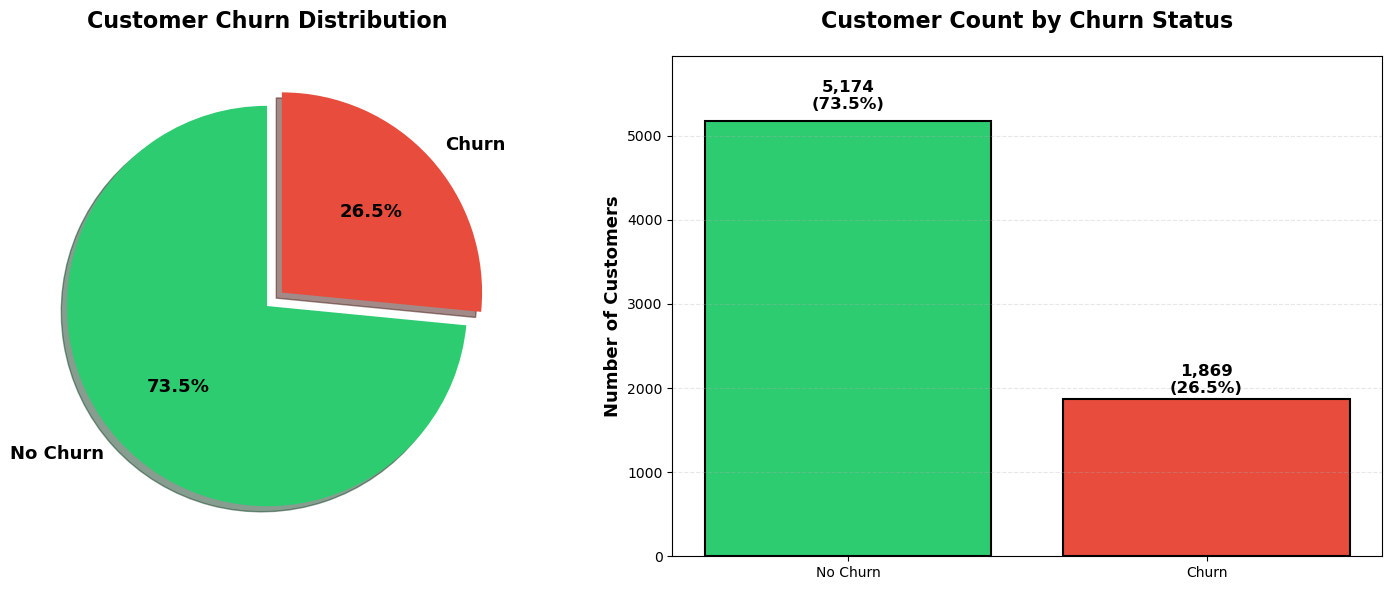

In [150]:
# Visualization 1: Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors = ['#2ecc71', '#e74c3c']  # Green for No, Red for Yes
explode = (0, 0.1)  # Explode the Churn slice

axes[0].pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%',
            colors=colors, startangle=90, explode=explode,
            textprops={'fontsize': 13, 'weight': 'bold'},
            shadow=True)
axes[0].set_title('Customer Churn Distribution', 
                  fontsize=16, weight='bold', pad=20)

# Bar chart with counts
bars = axes[1].bar(['No Churn', 'Churn'], churn_counts.values, 
                   color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Number of Customers', fontsize=13, weight='bold')
axes[1].set_title('Customer Count by Churn Status', 
                  fontsize=16, weight='bold', pad=20)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

axes[1].set_ylim(0, max(churn_counts.values) * 1.15)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height * 1.02,
                f'{int(height):,}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

### Insights:
- There is a imbalanced ratio with No Churn having 5174 customers while Churn having 1869 customers.
- Roughly 1 in 4 customers churn annually.
- Larger "No Churn" class provides stable baseline.

### 2.3.1.2 Understanding distribution of features

NUMERICAL FEATURES DISTRIBUTION ANALYSIS


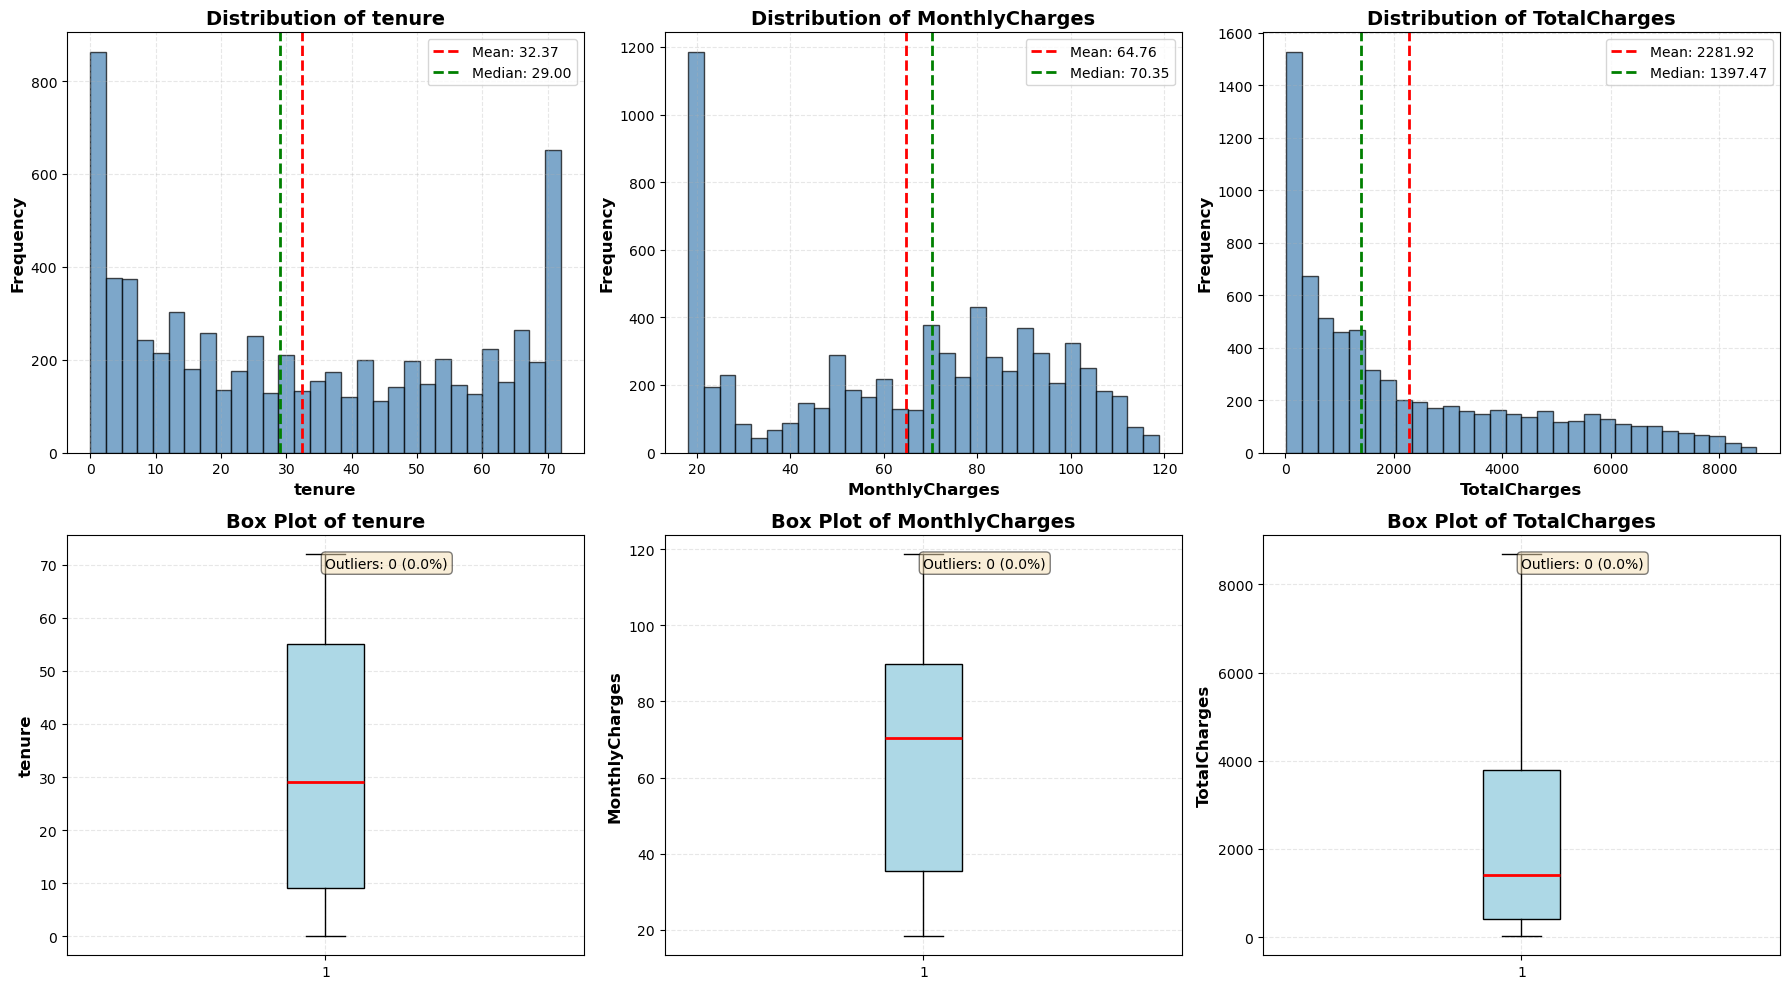


TENURE DETAILED STATISTICS
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Skewness: 0.240
Kurtosis: -1.387

Outlier Detection (IQR Method):
  Q1: 9.00
  Q3: 55.00
  IQR: 46.00
  Lower Bound: -60.00
  Upper Bound: 124.00
  Outliers: 0 (0.00%)

MONTHLYCHARGES DETAILED STATISTICS
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Skewness: -0.221
Kurtosis: -1.257

Outlier Detection (IQR Method):
  Q1: 35.50
  Q3: 89.85
  IQR: 54.35
  Lower Bound: -46.02
  Upper Bound: 171.38
  Outliers: 0 (0.00%)

TOTALCHARGES DETAILED STATISTICS
count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684

In [151]:
## Understanding distribution of features
# Numerical Features Distribution
print("="*70)
print("NUMERICAL FEATURES DISTRIBUTION ANALYSIS")
print("="*70)

# Prepare numerical data (convert TotalCharges)
df_viz = df.copy()
df_viz['TotalCharges'] = pd.to_numeric(df_viz['TotalCharges'], errors='coerce')
df_viz['TotalCharges'] = df_viz['TotalCharges'].fillna(
    df_viz['TotalCharges'].median()
)

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    # Histogram
    axes[idx].hist(df_viz[col], bins=30, color='steelblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=12, weight='bold')
    axes[idx].set_ylabel('Frequency', fontsize=12, weight='bold')
    axes[idx].set_title(f'Distribution of {col}', 
                        fontsize=14, weight='bold')
    axes[idx].grid(alpha=0.3, linestyle='--')
    
    # Add mean and median lines
    mean_val = df_viz[col].mean()
    median_val = df_viz[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', 
                      linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()
    
    # Box plot
    axes[idx + 3].boxplot(df_viz[col], vert=True, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='black'),
                          medianprops=dict(color='red', linewidth=2),
                          whiskerprops=dict(color='black'),
                          capprops=dict(color='black'))
    axes[idx + 3].set_ylabel(col, fontsize=12, weight='bold')
    axes[idx + 3].set_title(f'Box Plot of {col}', 
                            fontsize=14, weight='bold')
    axes[idx + 3].grid(alpha=0.3, linestyle='--')
    
    # Statistical summary on plot
    q1 = df_viz[col].quantile(0.25)
    q3 = df_viz[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_viz[(df_viz[col] < lower_bound) | (df_viz[col] > upper_bound)][col]
    
    axes[idx + 3].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
                       transform=axes[idx + 3].transAxes,
                       fontsize=10, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Print detailed statistics
for col in numerical_features:
    print(f"\n{'='*70}")
    print(f"{col.upper()} DETAILED STATISTICS")
    print(f"{'='*70}")
    
    stats = df_viz[col].describe()
    print(stats)
    
    # Skewness and kurtosis
    skewness = df_viz[col].skew()
    kurtosis = df_viz[col].kurt()
    print(f"\nSkewness: {skewness:.3f}")
    print(f"Kurtosis: {kurtosis:.3f}")
    
    # Outlier analysis
    q1 = df_viz[col].quantile(0.25)
    q3 = df_viz[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_viz[(df_viz[col] < lower_bound) | (df_viz[col] > upper_bound)]
    
    print(f"\nOutlier Detection (IQR Method):")
    print(f"  Q1: {q1:.2f}")
    print(f"  Q3: {q3:.2f}")
    print(f"  IQR: {iqr:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    
print(f"\n{'='*70}")

### Insights:
- TENURE DISTRIBUTION:
   - Shape is relatively uniform with slight peaks at both ends meaning New customers (0-12 months) and loyal customers (60-72 months).
   - Mean: 32.37 months ≈ Median: 29 months (minimal skew)
   - Skewness: ~0.24 (slightly right-skewed)
   - Range: 0-72 months (full customer lifecycle represented)

- MONTHLY CHARGES DISTRIBUTION:
   - Shape is roughly symmetrical with the exception of $20 peak
   - Skewness: -0.22 (slight left skew)
   - Range: $18.25 - $118.75 (wide range)

- TOTAL CHARGES DISTRIBUTION:
   - Shape is heavily right-skewed.
   - Mean: $2,282 >> Median: $1,397 (large gap)
   - Skewness: ~1 (significant right skew)
   - Range: $18.80 - $8,684.80 (very wide)


CATEGORICAL FEATURES DISTRIBUTION ANALYSIS


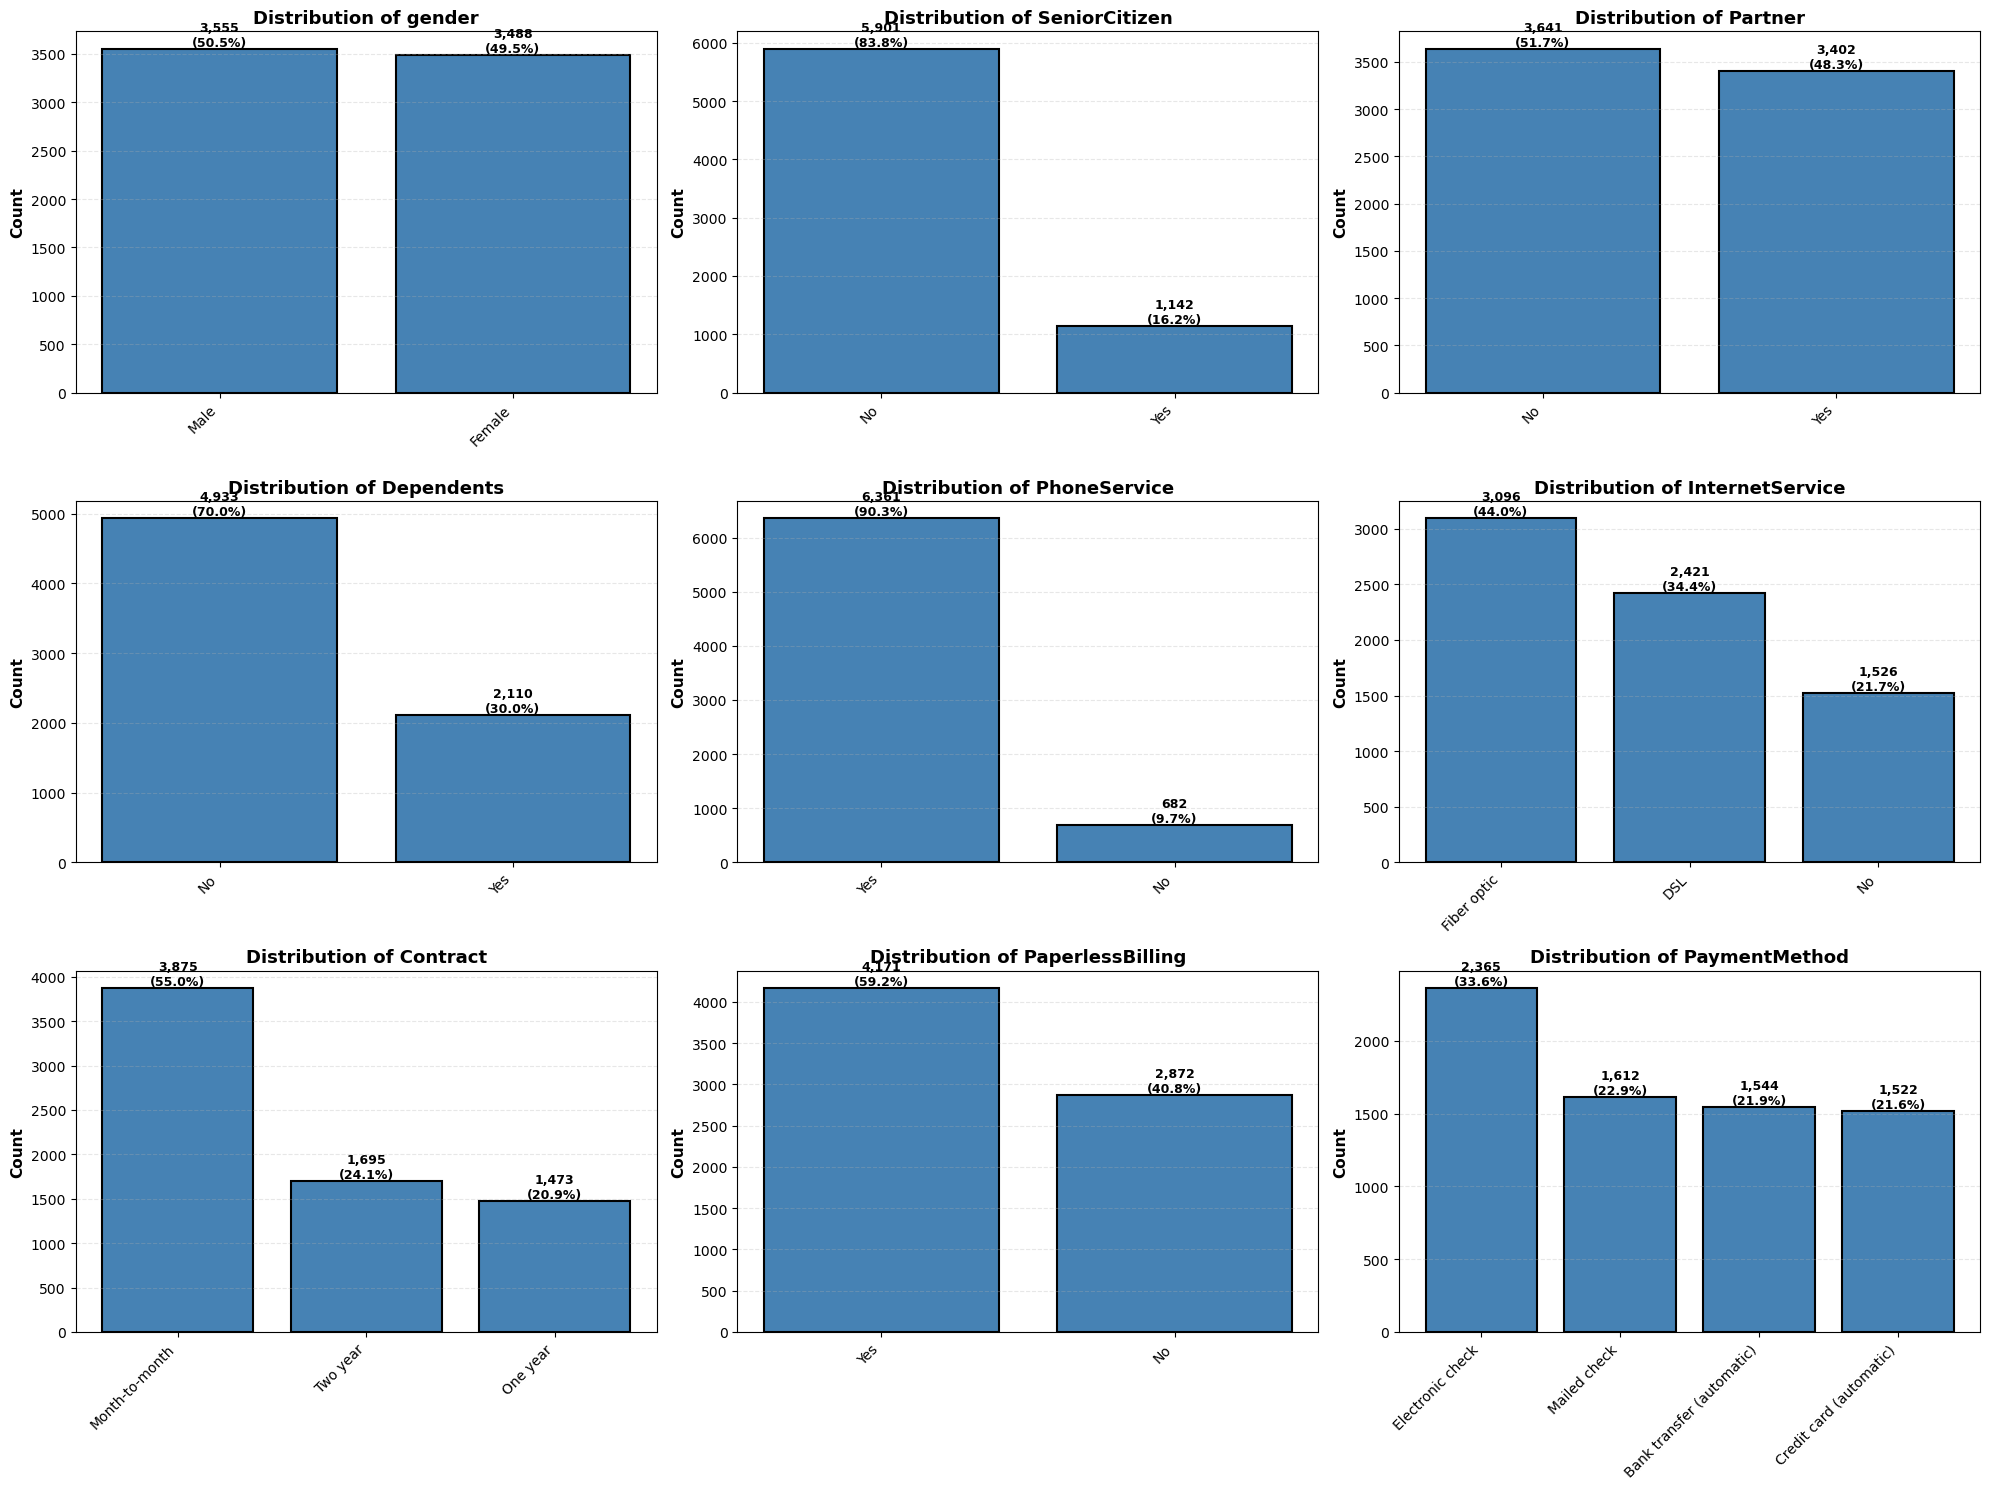


GENDER DISTRIBUTION
        Count  Percentage
gender                   
Male     3555    50.47565
Female   3488    49.52435

Majority class: Male (50.5%)
Minority class: Female (49.5%)
Balanced: 1.0:1 ratio

SENIORCITIZEN DISTRIBUTION
               Count  Percentage
SeniorCitizen                   
No              5901   83.785319
Yes             1142   16.214681

Majority class: No (83.8%)
Minority class: Yes (16.2%)
IMBALANCED: 5.2:1 ratio

PARTNER DISTRIBUTION
         Count  Percentage
Partner                   
No        3641    51.69672
Yes       3402    48.30328

Majority class: No (51.7%)
Minority class: Yes (48.3%)
Balanced: 1.1:1 ratio

DEPENDENTS DISTRIBUTION
            Count  Percentage
Dependents                   
No           4933   70.041176
Yes          2110   29.958824

Majority class: No (70.0%)
Minority class: Yes (30.0%)
Balanced: 2.3:1 ratio

PHONESERVICE DISTRIBUTION
              Count  Percentage
PhoneService                   
Yes            6361   90.31662

In [152]:
#Categorical Features Distribution

print("\n" + "="*70)
print("CATEGORICAL FEATURES DISTRIBUTION ANALYSIS")
print("="*70)

# Select key categorical features for visualization
categorical_viz = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'InternetService', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod']

# Create visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for idx, col in enumerate(categorical_viz):
    if col == 'SeniorCitizen':
        # Convert to Yes/No for better visualization
        data = df[col].map({0: 'No', 1: 'Yes'})
    else:
        data = df[col]
    
    counts = data.value_counts()
    percentages = counts / len(df) * 100
    
    # Bar plot
    bars = axes[idx].bar(range(len(counts)), counts.values, 
                         color='steelblue', edgecolor='black', linewidth=1.5)
    axes[idx].set_xticks(range(len(counts)))
    axes[idx].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Count', fontsize=11, weight='bold')
    axes[idx].set_title(f'Distribution of {col}', 
                        fontsize=13, weight='bold')
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add percentage labels
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{int(height):,}\n({pct:.1f}%)',
                      ha='center', va='bottom', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

# Detailed statistics
for col in categorical_viz:
    print(f"\n{'='*70}")
    print(f"{col.upper()} DISTRIBUTION")
    print(f"{'='*70}")
    
    if col == 'SeniorCitizen':
        data = df[col].map({0: 'No', 1: 'Yes'})
    else:
        data = df[col]
    
    counts = data.value_counts()
    percentages = counts / len(df) * 100
    
    result = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })
    print(result)
    
    # Identify majority/minority classes
    majority = result.idxmax()['Count']
    minority = result.idxmin()['Count']
    print(f"\nMajority class: {majority} ({result.loc[majority, 'Percentage']:.1f}%)")
    print(f"Minority class: {minority} ({result.loc[minority, 'Percentage']:.1f}%)")
    
    # Check for severe imbalance
    imbalance_ratio = result.loc[majority, 'Count'] / result.loc[minority, 'Count']
    if imbalance_ratio > 3:
        print(f"IMBALANCED: {imbalance_ratio:.1f}:1 ratio")
    else:
        print(f"Balanced: {imbalance_ratio:.1f}:1 ratio")

print(f"\n{'='*70}")

### Insights:

DEMOGRAPHIC FEATURES:
- Gender is mostly balanced with Male (50.5%) and Famale (49.5%)
- SENIOR CITIZEN is imbalanced with No (83.8%) and Yes (16.2%).
- PARTNER is balanced with No (51.7%) and Yes (48.3%).
- DEPENDENTS is imbalanced with No (70.0%) and Yes (30.0%).

SERVICE FEATURES:
- PHONE SERVICE is mostly imbalanced with Yes (90.3%) and No (9.7%).
- INTERNET SERVICE is roughly balanced across three categories with Fiber optic: (44.0%), DSL (34.4%), and No (21.6%).
- CONTRACT is imbalanced with Month-to-month (55.0%), more than the combination of Two year (24.1%) and One year (20.9%).

ACCOUNT FEATURES:
- PAPERLESS BILLING is balanced with Yes (59.2%) and No: (40.8%).
- PAYMENT METHOD is balanced across four categories with Electronic check (33.6%), Mailed check (22.9%), Bank transfer (auto): (21.9%), and Credit card (auto): 21.6%.

### 2.3.2 Understanding relationship between variables

CORRELATION ANALYSIS


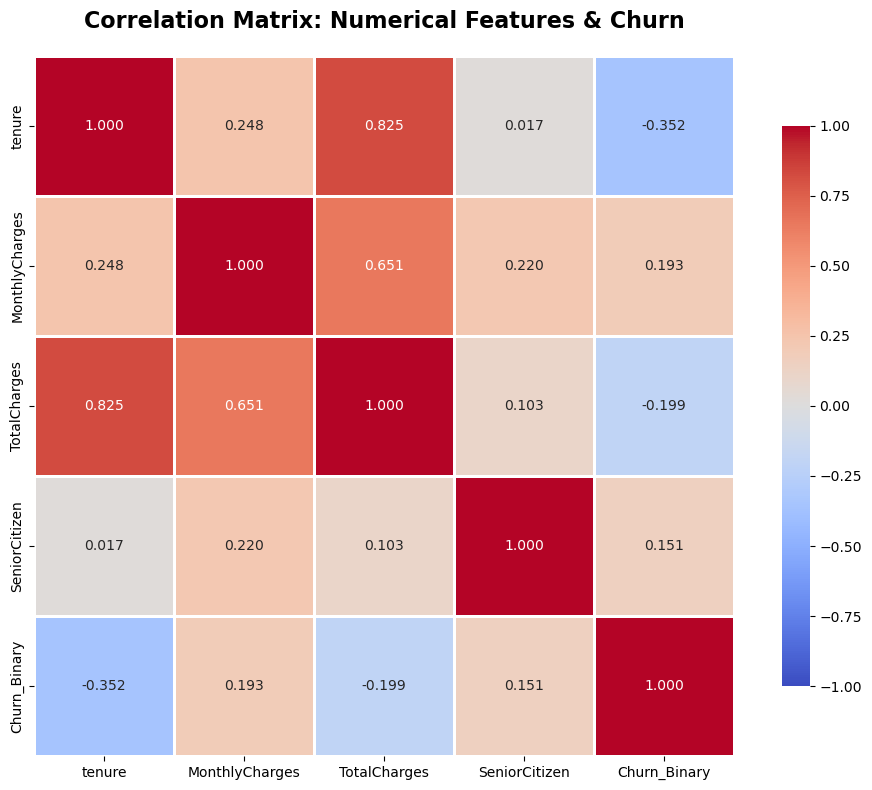


HIGH CORRELATIONS (|r| > 0.5)
tenure               ↔ TotalCharges        : +0.825
MonthlyCharges       ↔ TotalCharges        : +0.651

FEATURE CORRELATION WITH CHURN (Ranked)
MonthlyCharges      : +0.193  (MODERATE ↑ Positive)
SeniorCitizen       : +0.151  (MODERATE ↑ Positive)
TotalCharges        : -0.199  (MODERATE ↓ Negative)
tenure              : -0.352  (STRONG ↓ Negative)


In [153]:
## Understanding relationship between variables
# Correlation Analysis
print("="*70)
print("CORRELATION ANALYSIS")
print("="*70)

# Prepare numerical dataset
df_corr = df.copy()
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
df_corr['TotalCharges'] = df_corr['TotalCharges'].fillna(
    df_corr['TotalCharges'].median()
)

# Encode target
df_corr['Churn_Binary'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Select numerical features
numerical_features_corr = ['tenure', 'MonthlyCharges', 'TotalCharges', 
                           'SeniorCitizen', 'Churn_Binary']

# Calculate correlation matrix
correlation_matrix = df_corr[numerical_features_corr].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix: Numerical Features & Churn', 
          fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify high correlations
print("\n" + "="*70)
print("HIGH CORRELATIONS (|r| > 0.5)")
print("="*70)

high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if high_corr:
    for item in sorted(high_corr, key=lambda x: abs(x['Correlation']), reverse=True):
        print(f"{item['Feature 1']:20s} ↔ {item['Feature 2']:20s}: {item['Correlation']:+.3f}")
else:
    print("No correlations above 0.5 threshold")

print("="*70)

# Churn correlation ranking
churn_correlations = correlation_matrix['Churn_Binary'].drop('Churn_Binary').sort_values(ascending=False)

print("\n" + "="*70)
print("FEATURE CORRELATION WITH CHURN (Ranked)")
print("="*70)
for feature, corr in churn_correlations.items():
    direction = "↑ Positive" if corr > 0 else "↓ Negative"
    strength = "STRONG" if abs(corr) > 0.3 else "MODERATE" if abs(corr) > 0.15 else "WEAK"
    print(f"{feature:20s}: {corr:+.3f}  ({strength} {direction})")
print("="*70)

### Insights:
- There is a very strong positive r value which is +0.825 between tenure and TotalCharges, and a strong positive r value which is +0.651 between MonthlyCharges and TotalCharges.

- Churn correlations:
    - We can find r = -0.352 (MODERATE negative) with tenure, r = +0.193 (WEAK positive) with MonthlyCharges, r = -0.198 (WEAK negative) with TotalCharges, and r = +0.151 (WEAK positive) with SeniorCitizen.


CHURN RATE BY CATEGORICAL FEATURES


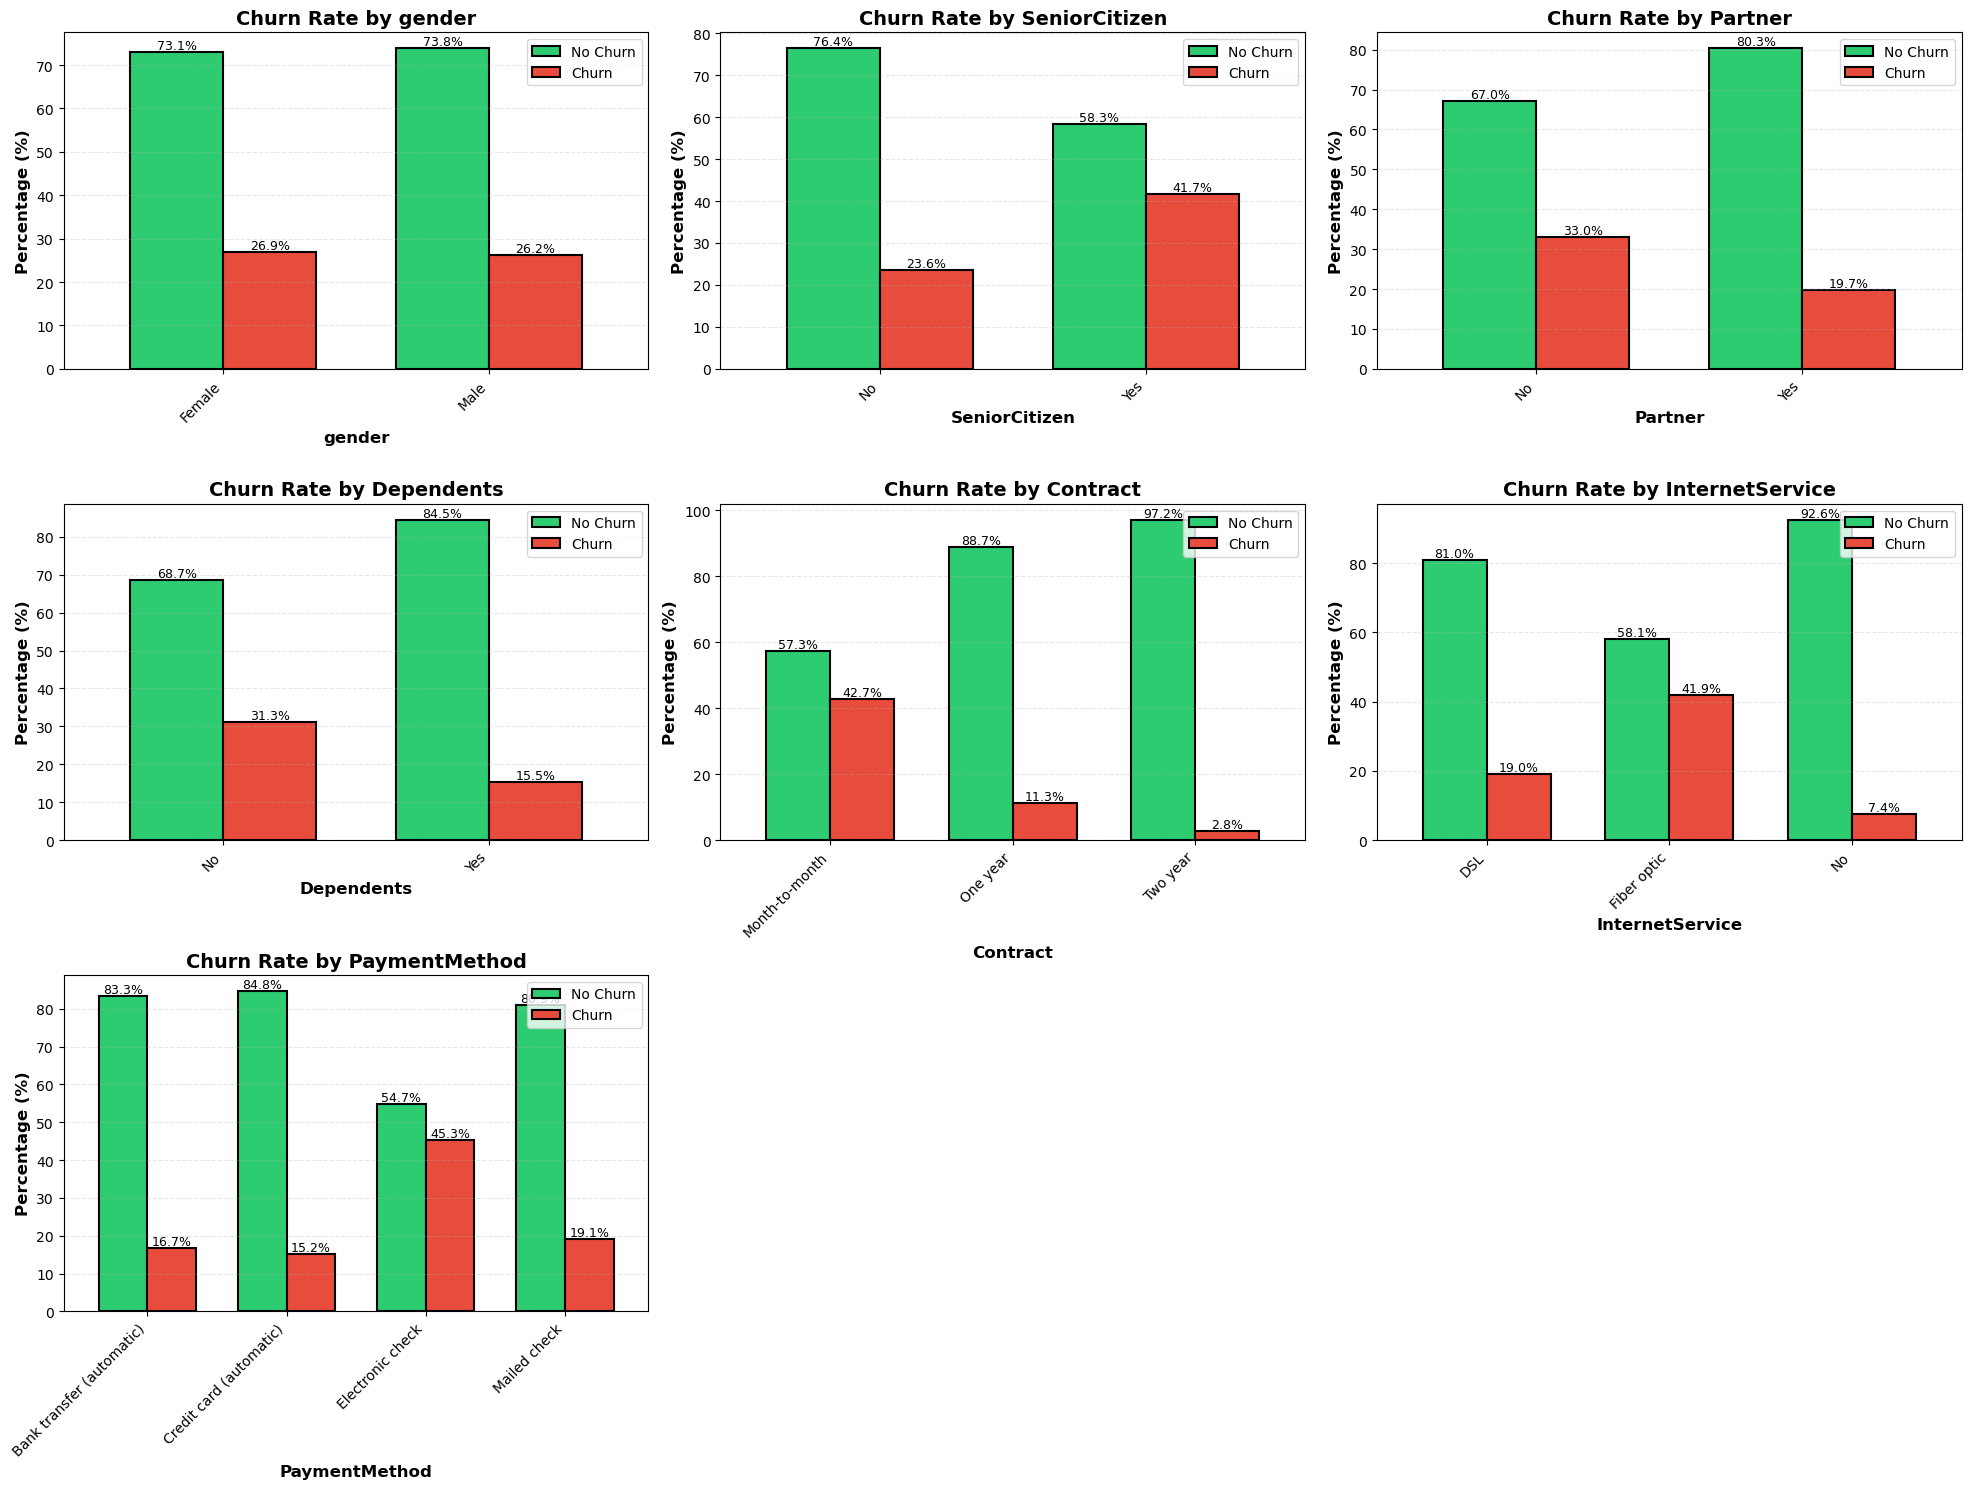


CHURN ANALYSIS: GENDER

Counts:
Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043

Churn Rate (%):
gender
Female    26.920872
Male      26.160338
Name: Yes, dtype: float64

HIGHEST CHURN: Female (26.9%)
LOWEST CHURN:  Male (26.2%)
Variance: 0.5% (higher = more predictive)

CHURN ANALYSIS: SENIORCITIZEN

Counts:
Churn            No   Yes   All
SeniorCitizen                  
No             4508  1393  5901
Yes             666   476  1142
All            5174  1869  7043

Churn Rate (%):
SeniorCitizen
Yes    41.681261
No     23.606168
Name: Yes, dtype: float64

HIGHEST CHURN: Yes (41.7%)
LOWEST CHURN:  No (23.6%)
Variance: 12.8% (higher = more predictive)

CHURN ANALYSIS: PARTNER

Counts:
Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043

Churn Rate (%):
Partner
No     32.957979
Yes    19.664903
Name: Yes, dtype: float64

HIGHEST CHURN

In [154]:
# Churn Rate by Categorical Features

print("\n" + "="*70)
print("CHURN RATE BY CATEGORICAL FEATURES")
print("="*70)

# Key categorical features to analyze
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'Contract', 'InternetService', 'PaymentMethod']

# Create comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    # Calculate churn rate by category
    if feature == 'SeniorCitizen':
        data = df.copy()
        data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
        churn_by_cat = pd.crosstab(data[feature], data['Churn'], normalize='index') * 100
    else:
        churn_by_cat = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Plot
    churn_by_cat.plot(kind='bar', stacked=False, ax=axes[idx], 
                      color=['#2ecc71', '#e74c3c'], width=0.7,
                      edgecolor='black', linewidth=1.5)
    axes[idx].set_xlabel(feature, fontsize=12, weight='bold')
    axes[idx].set_ylabel('Percentage (%)', fontsize=12, weight='bold')
    axes[idx].set_title(f'Churn Rate by {feature}', fontsize=14, weight='bold')
    axes[idx].legend(['No Churn', 'Churn'], loc='upper right')
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    
    # Add percentage labels
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

# Remove empty subplots
for idx in range(len(categorical_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Detailed statistics
churn_analysis = []

for feature in categorical_features:
    print(f"\n{'='*70}")
    print(f"CHURN ANALYSIS: {feature.upper()}")
    print(f"{'='*70}")
    
    if feature == 'SeniorCitizen':
        data = df.copy()
        data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
        crosstab = pd.crosstab(data[feature], data['Churn'], margins=True)
        churn_rate = pd.crosstab(data[feature], data['Churn'], normalize='index') * 100
    else:
        crosstab = pd.crosstab(df[feature], df['Churn'], margins=True)
        churn_rate = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    print("\nCounts:")
    print(crosstab)
    print("\nChurn Rate (%):")
    print(churn_rate['Yes'].sort_values(ascending=False))
    
    # Identify high and low churn categories
    max_churn = churn_rate['Yes'].idxmax()
    min_churn = churn_rate['Yes'].idxmin()
    churn_variance = churn_rate['Yes'].std()
    
    print(f"\nHIGHEST CHURN: {max_churn} ({churn_rate.loc[max_churn, 'Yes']:.1f}%)")
    print(f"LOWEST CHURN:  {min_churn} ({churn_rate.loc[min_churn, 'Yes']:.1f}%)")
    print(f"Variance: {churn_variance:.1f}% (higher = more predictive)")
    
    churn_analysis.append({
        'Feature': feature,
        'Max_Churn_Category': max_churn,
        'Max_Churn_Rate': churn_rate.loc[max_churn, 'Yes'],
        'Min_Churn_Category': min_churn,
        'Min_Churn_Rate': churn_rate.loc[min_churn, 'Yes'],
        'Churn_Rate_Variance': churn_variance
    })

# Summary of predictive power
print(f"\n{'='*70}")
print("FEATURE PREDICTIVE POWER RANKING (By Churn Rate Variance)")
print(f"{'='*70}")

churn_analysis_df = pd.DataFrame(churn_analysis).sort_values('Churn_Rate_Variance', ascending=False)
print(churn_analysis_df[['Feature', 'Churn_Rate_Variance']].to_string(index=False))
print(f"{'='*70}")

## Insights:
- For Contract, Month-to-month has 42.7% churn meaning customers with short duration subscription are more likely to stop using the telecom service.
- For InternetService, Fiber optic has unexpectedly highest churn likely due to premium pricing + competition.
- For PaymentMethod, Electronic check has 3x higher churn than automated methods.
- For SeniorCitizen, they are almost 2 times likely to churn.

Overall Variance Ranking:
1. Contract (Variance: ~20%)
2. InternetService (Variance: ~17%)
3. PaymentMethod (Variance: ~15%)
4. SeniorCitizen (Variance: ~13%)
5. Partner/Dependents (Variance: ~9%)
6. Gender (Variance: ~0.5%) - WEAK

By looking at the variance ranking, everything except gender should be included in feature selection.

# 3. Data Preparation

## 3.1 Data Cleaning

In [155]:
## Clean data
# Handle TotalCharges data type issue
# During EDA, we noticed TotalCharges is stored as text instead of numbers

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing values we created
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Look at the rows with missing TotalCharges
if df['TotalCharges'].isnull().sum() > 0:
    print("\nRows with missing TotalCharges:")
    print(df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']].head())

"""
These are customers with 0 tenure (just signed up), so TotalCharges is empty.
We'll fill with 0 since they haven't been charged yet.
"""

df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Drop customerID if it exists
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

print(f"\nCleaned dataset shape: {df.shape}")
print(f"Any remaining missing values: {df.isnull().sum().sum()}")

Missing values in TotalCharges: 11

Rows with missing TotalCharges:
      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN

Cleaned dataset shape: (7043, 20)
Any remaining missing values: 0


## 3.2 One-Hot Encoding

In [156]:
# 3.2 Encoding Categorical Variables (One-Hot Encoding)

# Target variable: Convert Yes/No to 1/0
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Binary features: Simple Yes/No to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Gender: Male/Female to 1/0
if 'gender' in df.columns and df['gender'].dtype == 'object':
    df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

print("Before One-Hot Encoding:")
print(f"Dataset shape: {df.shape}")

# Check which categorical columns actually exist
all_categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Only keep columns that exist and are still categorical
categorical_cols = [col for col in all_categorical_cols if col in df.columns and df[col].dtype == 'object']

print(f"\nColumns to encode: {categorical_cols}")

# Apply One-Hot Encoding only if there are columns to encode
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("\nOne-Hot Encoding applied!")
else:
    print("\nNo categorical columns left to encode (already done)")

print(f"\nAfter encoding:")
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())

Before One-Hot Encoding:
Dataset shape: (7043, 20)

Columns to encode: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

One-Hot Encoding applied!

After encoding:
Dataset shape: (7043, 31)

Column names:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (autom

## 3.3 Train-Test Split

In [157]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nChurn distribution:")
print(y.value_counts())
print(f"Churn rate: {y.mean():.2%}")

# Split into train and test sets (80-20 split)
# stratify=y ensures same churn rate in both train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"Train churn rate: {y_train.mean():.2%}")
print(f"Test churn rate: {y_test.mean():.2%}")

Features shape: (7043, 30)
Target shape: (7043,)

Churn distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn rate: 26.54%

Train set: 5634 samples, 30 features
Test set: 1409 samples, 30 features
Train churn rate: 26.54%
Test churn rate: 26.54%


## 3.4 Feature Scaling

In [158]:
# 3.4 Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed using StandardScaler")
print(f"\nExample - MonthlyCharges before scaling:")
print(f"  Mean: {X_train['MonthlyCharges'].mean():.2f}")
print(f"  Std: {X_train['MonthlyCharges'].std():.2f}")

print(f"\nMonthlyCharges after scaling:")
print(f"  Mean: {X_train_scaled['MonthlyCharges'].mean():.4f}")
print(f"  Std: {X_train_scaled['MonthlyCharges'].std():.4f}")

print(f"\nScaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")

Feature scaling completed using StandardScaler

Example - MonthlyCharges before scaling:
  Mean: 64.93
  Std: 30.14

MonthlyCharges after scaling:
  Mean: -0.0000
  Std: 1.0001

Scaled training set shape: (5634, 30)
Scaled test set shape: (1409, 30)


## 3.5 Data Preparation Summary

In [159]:
print("="*60)
print("DATA PREPARATION SUMMARY")
print("="*60)

print(f"\n1. Data Cleaning:")
print(f"   Fixed TotalCharges data type (converted to numeric)")
print(f"   Handled 11 missing values (filled with 0)")
print(f"   Removed customerID column")

print(f"\n2. Encoding:")
print(f"   Target variable: Churn (Yes=1, No=0)")
print(f"   Binary features: Converted to 0/1")
print(f"   One-Hot Encoding: Applied to {len(categorical_cols)} categorical features")
print(f"   Total features after encoding: {X_train.shape[1]}")

print(f"\n3. Train-Test Split:")
print(f"   Training set: {X_train.shape[0]} samples (80%)")
print(f"   Test set: {X_test.shape[0]} samples (20%)")
print(f"   Stratified split (preserves churn distribution)")

print(f"\n4. Feature Scaling:")
print(f"   StandardScaler applied")
print(f"   All features normalized (mean=0, std=1)")

print(f"\nData is ready for base model training!")
print("="*60)

DATA PREPARATION SUMMARY

1. Data Cleaning:
   Fixed TotalCharges data type (converted to numeric)
   Handled 11 missing values (filled with 0)
   Removed customerID column

2. Encoding:
   Target variable: Churn (Yes=1, No=0)
   Binary features: Converted to 0/1
   One-Hot Encoding: Applied to 10 categorical features
   Total features after encoding: 30

3. Train-Test Split:
   Training set: 5634 samples (80%)
   Test set: 1409 samples (20%)
   Stratified split (preserves churn distribution)

4. Feature Scaling:
   StandardScaler applied
   All features normalized (mean=0, std=1)

Data is ready for base model training!


## Verify Data After Preparation

In [160]:
# Quick check: Compare key features before and after preparation

print("="*60)
print("DATA VERIFICATION AFTER PREPARATION")
print("="*60)

# Check the encoded dataset
print(f"\nDataset shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print("\nFeature types:")
print(df.dtypes.value_counts())

# Check target distribution is preserved
print(f"\nChurn distribution in full dataset:")
print(df['Churn'].value_counts())
print(f"Churn rate: {df['Churn'].mean():.2%}")

DATA VERIFICATION AFTER PREPARATION

Dataset shape: (7043, 31)
Number of features: 31

Feature types:
bool       21
int64       8
float64     2
Name: count, dtype: int64

Churn distribution in full dataset:
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn rate: 26.54%


## 3.7 Post-Preparation Visualization

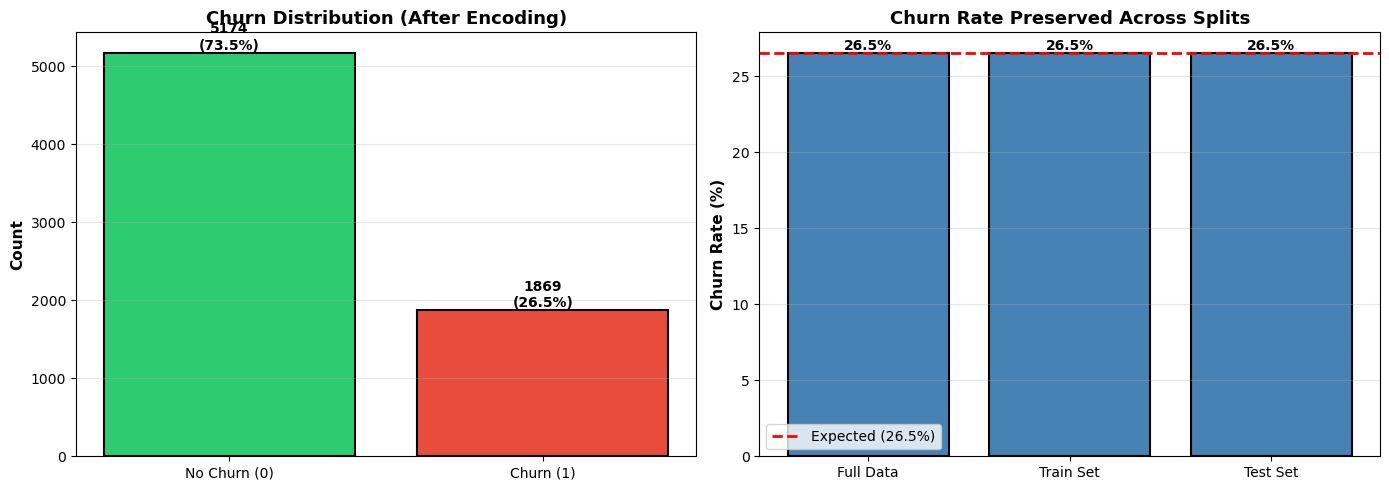


Churn rate consistent across all datasets
Stratified split working correctly


In [161]:
# Check churn rate is preserved after encoding

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn distribution
churn_counts = df['Churn'].value_counts()
colors = ['#2ecc71', '#e74c3c']

axes[0].bar(['No Churn (0)', 'Churn (1)'], churn_counts.values, 
            color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Count', fontsize=11, weight='bold')
axes[0].set_title('Churn Distribution (After Encoding)', fontsize=13, weight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v, f'{v}\n({v/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontsize=10, weight='bold')

# Train vs Test churn rate comparison
split_comparison = pd.DataFrame({
    'Dataset': ['Full Data', 'Train Set', 'Test Set'],
    'Churn Rate': [df['Churn'].mean(), y_train.mean(), y_test.mean()]
})

axes[1].bar(split_comparison['Dataset'], split_comparison['Churn Rate']*100, 
            color='steelblue', edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Churn Rate (%)', fontsize=11, weight='bold')
axes[1].set_title('Churn Rate Preserved Across Splits', fontsize=13, weight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=26.5, color='red', linestyle='--', linewidth=2, label='Expected (26.5%)')
axes[1].legend()

for i, v in enumerate(split_comparison['Churn Rate']):
    axes[1].text(i, v*100, f'{v*100:.1f}%', 
                ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

print("\nChurn rate consistent across all datasets")
print("Stratified split working correctly")

In [162]:
# Show how One-Hot Encoding expanded the features

print("\n" + "="*60)
print("FEATURE EXPANSION FROM ONE-HOT ENCODING")
print("="*60)

original_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
                     'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

encoded_features = [col for col in df.columns if col != 'Churn']

# Show examples of OHE features created
ohe_examples = [col for col in encoded_features if '_' in col]

print(f"\nOriginal categorical features (before OHE): 11")
print(f"Total features after OHE: {len(encoded_features)}")
print(f"New binary features created: {len(ohe_examples)}")

print(f"\nExamples of One-Hot Encoded features:")
for col in ohe_examples[:10]:  # Show first 10
    print(f"  - {col}")

print(f"\n... and {len(ohe_examples)-10} more")


FEATURE EXPANSION FROM ONE-HOT ENCODING

Original categorical features (before OHE): 11
Total features after OHE: 30
New binary features created: 21

Examples of One-Hot Encoded features:
  - MultipleLines_No phone service
  - MultipleLines_Yes
  - InternetService_Fiber optic
  - InternetService_No
  - OnlineSecurity_No internet service
  - OnlineSecurity_Yes
  - OnlineBackup_No internet service
  - OnlineBackup_Yes
  - DeviceProtection_No internet service
  - DeviceProtection_Yes

... and 11 more


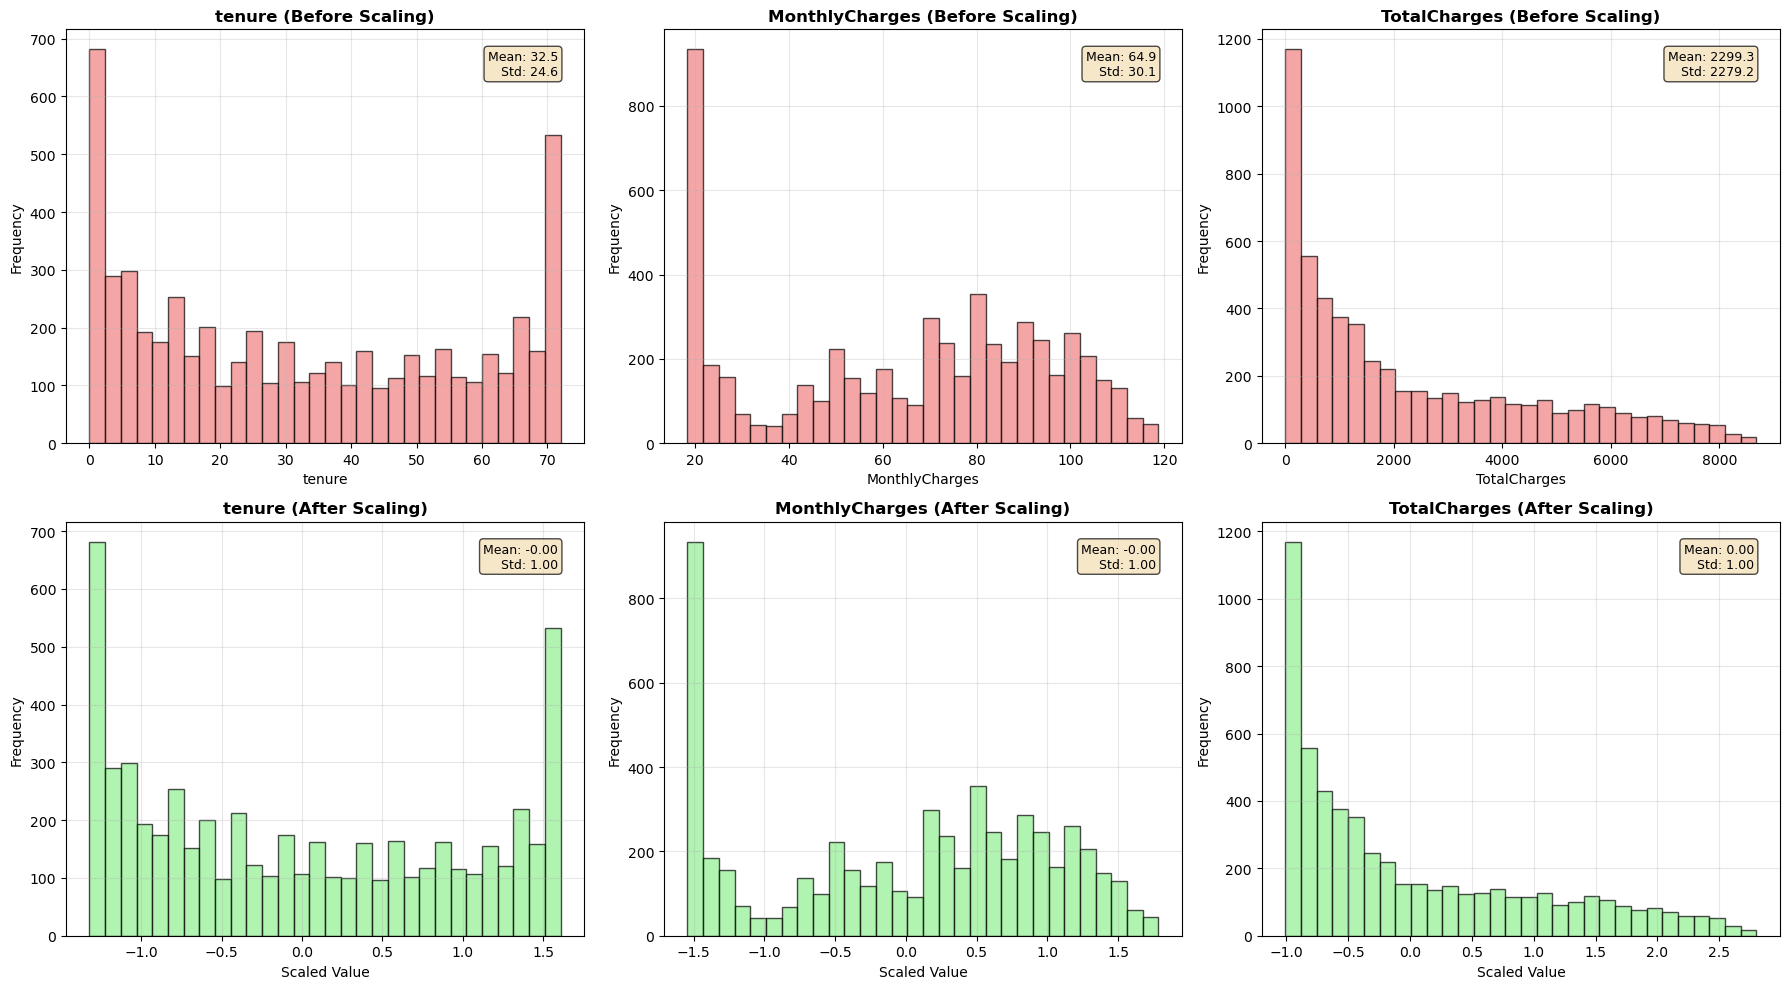


OBSERVATIONS:
Distribution shapes remain the same (scaling preserves relationships)
All features now have mean ≈ 0 and std ≈ 1
Different scales are now comparable (e.g., tenure vs TotalCharges)


In [163]:
# Visualize feature scaling effect

# Pick a few features to show scaling effect
sample_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, feature in enumerate(sample_features):
    # Before scaling
    axes[0, idx].hist(X_train[feature], bins=30, color='lightcoral', 
                     edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'{feature} (Before Scaling)', fontsize=12, weight='bold')
    axes[0, idx].set_xlabel(feature, fontsize=10)
    axes[0, idx].set_ylabel('Frequency', fontsize=10)
    axes[0, idx].grid(alpha=0.3)
    
    # Add statistics
    mean_val = X_train[feature].mean()
    std_val = X_train[feature].std()
    axes[0, idx].text(0.95, 0.95, f'Mean: {mean_val:.1f}\nStd: {std_val:.1f}',
                     transform=axes[0, idx].transAxes,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
                     fontsize=9)
    
    # After scaling
    axes[1, idx].hist(X_train_scaled[feature], bins=30, color='lightgreen', 
                     edgecolor='black', alpha=0.7)
    axes[1, idx].set_title(f'{feature} (After Scaling)', fontsize=12, weight='bold')
    axes[1, idx].set_xlabel('Scaled Value', fontsize=10)
    axes[1, idx].set_ylabel('Frequency', fontsize=10)
    axes[1, idx].grid(alpha=0.3)
    
    # Add statistics
    mean_val = X_train_scaled[feature].mean()
    std_val = X_train_scaled[feature].std()
    axes[1, idx].text(0.95, 0.95, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                     transform=axes[1, idx].transAxes,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
                     fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("OBSERVATIONS:")
print("="*60)
print("Distribution shapes remain the same (scaling preserves relationships)")
print("All features now have mean ≈ 0 and std ≈ 1")
print("Different scales are now comparable (e.g., tenure vs TotalCharges)")
print("="*60)

# 4. Modelling

## 4.1 Import Required Libraries

In [164]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

import time

## 4.2 Define Models to Compare

In [165]:
# Initialize models with default parameters (base models)
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'Extra Trees': ExtraTreesClassifier(random_state=42, n_estimators=100)
}

print(f"Total models to train: {len(models)}")
print(f"Models: {list(models.keys())}")

Total models to train: 7
Models: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'KNN', 'Extra Trees']


## 4.3 Train and Evaluate Base Models

In [166]:
## Initialise and train models
# Store results
results = []

print("="*70)
print("TRAINING BASE MODELS")
print("="*70)

for name, model in models.items():
    print(f"\nTraining: {name}")
    print("-" * 70)
    
    # Train model
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time': training_time
    })
    
    # Print results
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"Time:      {training_time:.3f}s")

print("\n" + "="*70)
print("ALL MODELS TRAINED SUCCESSFULLY")
print("="*70)

TRAINING BASE MODELS

Training: Logistic Regression
----------------------------------------------------------------------
Accuracy:  0.8070
Precision: 0.6584
Recall:    0.5668
F1 Score:  0.6092
ROC-AUC:   0.8418
Time:      0.072s

Training: Decision Tree
----------------------------------------------------------------------
Accuracy:  0.7310
Precision: 0.4930
Recall:    0.4733
F1 Score:  0.4829
ROC-AUC:   0.6482
Time:      0.066s

Training: Random Forest
----------------------------------------------------------------------
Accuracy:  0.7842
Precision: 0.6215
Recall:    0.4786
F1 Score:  0.5408
ROC-AUC:   0.8221
Time:      1.331s

Training: Gradient Boosting
----------------------------------------------------------------------
Accuracy:  0.7984
Precision: 0.6552
Recall:    0.5080
F1 Score:  0.5723
ROC-AUC:   0.8416
Time:      2.096s

Training: SVC
----------------------------------------------------------------------
Accuracy:  0.7928
Precision: 0.6444
Recall:    0.4893
F1 Score:  0.

## 4.4 Compare Model Performance

In [167]:
# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)

print("\n" + "="*70)
print("MODEL COMPARISON - RANKED BY F1 SCORE")
print("="*70)
print(results_df.to_string(index=False))
print("="*70)

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1 Score']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   F1 Score: {best_f1:.4f}")


MODEL COMPARISON - RANKED BY F1 SCORE
              Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC  Training Time
Logistic Regression  0.806955   0.658385 0.566845  0.609195 0.841778       0.071614
  Gradient Boosting  0.798439   0.655172 0.508021  0.572289 0.841585       2.095918
                SVC  0.792761   0.644366 0.489305  0.556231 0.796125       8.981213
        Extra Trees  0.784244   0.618243 0.489305  0.546269 0.798667       1.238294
      Random Forest  0.784244   0.621528 0.478610  0.540785 0.822074       1.331463
                KNN  0.747339   0.525281 0.500000  0.512329 0.771935       0.005254
      Decision Tree  0.731015   0.493036 0.473262  0.482947 0.648199       0.065882

🏆 Best Model: Logistic Regression
   F1 Score: 0.6092


## Baseline Comparison

In [168]:
# Calculate baseline (always predict majority class)
baseline_pred = [0] * len(y_test)  # Always predict "No Churn"
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("\n" + "="*70)
print("BASELINE COMPARISON")
print("="*70)
print(f"Baseline (Always predict No Churn): {baseline_accuracy:.4f}")
print(f"\nAll models vs Baseline:")
print("-" * 70)

for _, row in results_df.iterrows():
    improvement = ((row['Accuracy'] - baseline_accuracy) / baseline_accuracy) * 100
    beat_baseline = "✓" if row['Accuracy'] > baseline_accuracy else "✗"
    print(f"{row['Model']:25s}: {row['Accuracy']:.4f} ({improvement:+.1f}%) {beat_baseline}")

print("="*70)


BASELINE COMPARISON
Baseline (Always predict No Churn): 0.7346

All models vs Baseline:
----------------------------------------------------------------------
Logistic Regression      : 0.8070 (+9.9%) ✓
Gradient Boosting        : 0.7984 (+8.7%) ✓
SVC                      : 0.7928 (+7.9%) ✓
Extra Trees              : 0.7842 (+6.8%) ✓
Random Forest            : 0.7842 (+6.8%) ✓
KNN                      : 0.7473 (+1.7%) ✓
Decision Tree            : 0.7310 (-0.5%) ✗


## 4.6 Visualize Model Comparison

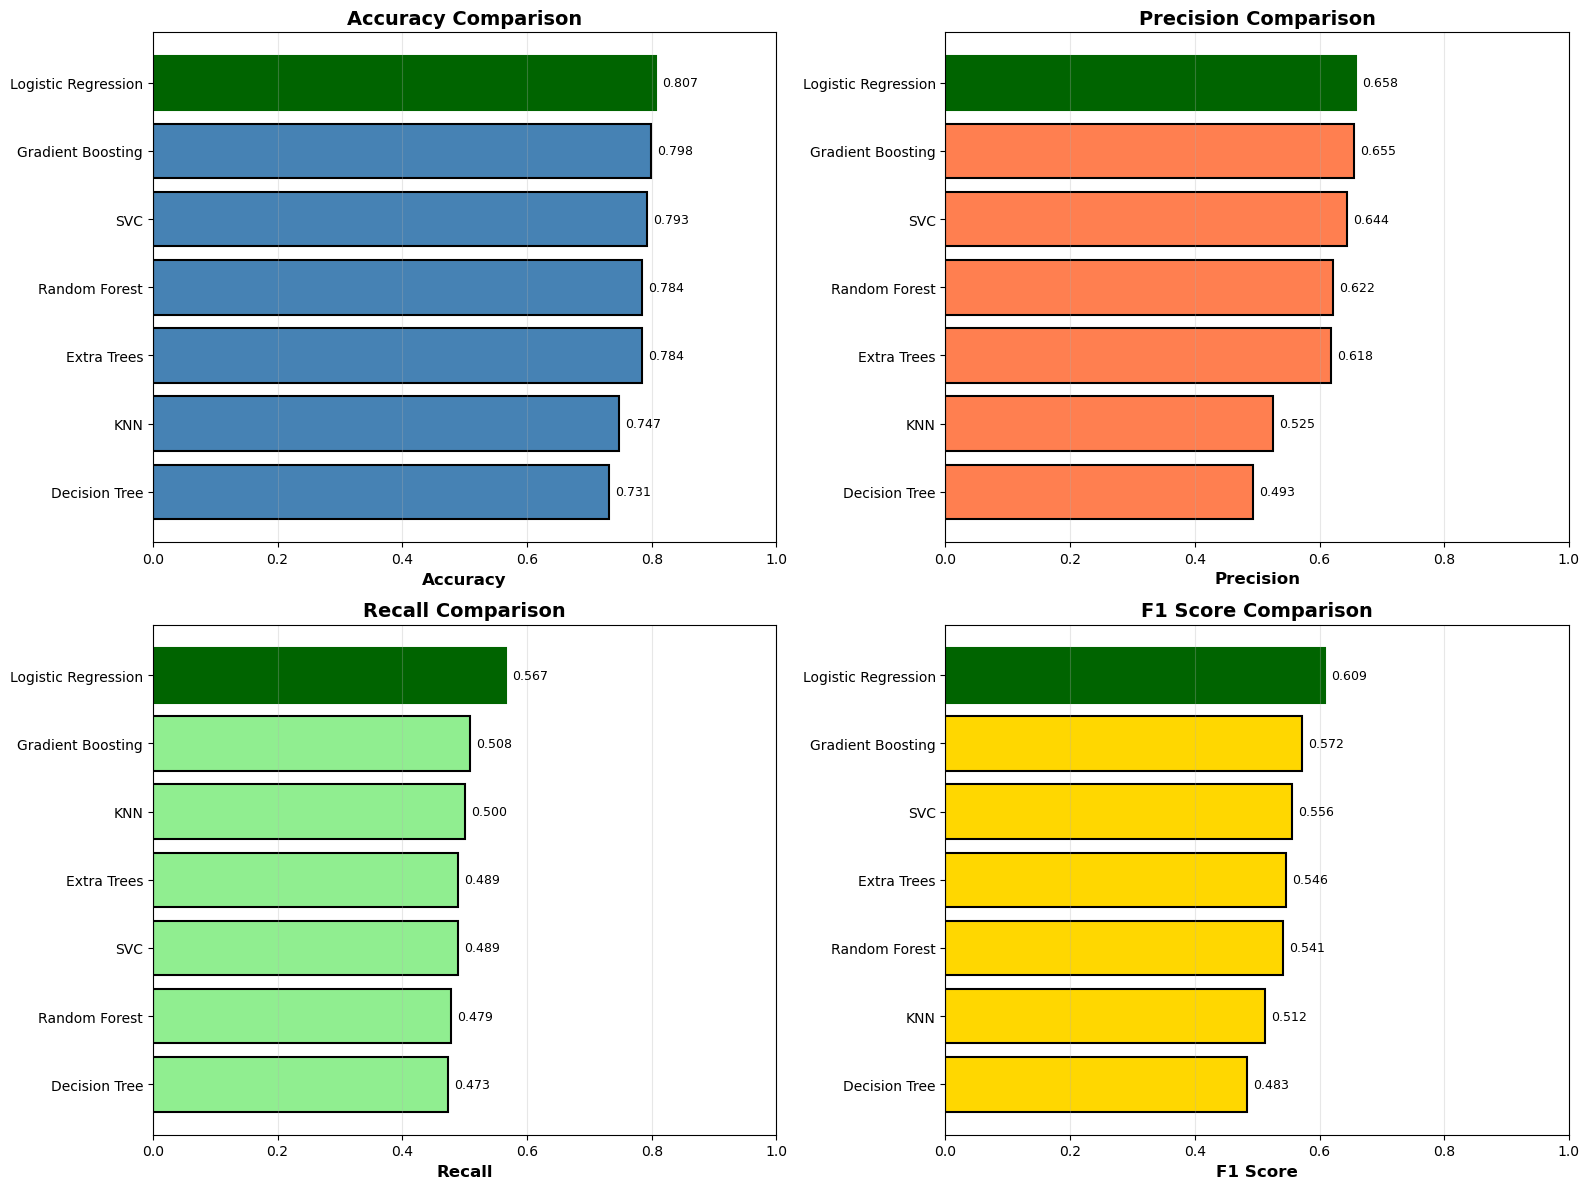

In [169]:
# Bar chart comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['steelblue', 'coral', 'lightgreen', 'gold']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    # Sort by current metric
    sorted_df = results_df.sort_values(metric, ascending=True)
    
    bars = ax.barh(sorted_df['Model'], sorted_df[metric], color=colors[idx], 
                   edgecolor='black', linewidth=1.5)
    ax.set_xlabel(metric, fontsize=12, weight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=14, weight='bold')
    ax.grid(axis='x', alpha=0.3)
    ax.set_xlim([0, 1])
    
    # Add values on bars
    for i, (bar, val) in enumerate(zip(bars, sorted_df[metric])):
        ax.text(val + 0.01, i, f'{val:.3f}', va='center', fontsize=9)
    
    # Highlight best
    best_idx = sorted_df[metric].idxmax()
    bars[list(sorted_df.index).index(best_idx)].set_color('darkgreen')

plt.tight_layout()
plt.show()

## 4.7 ROC Carve Comparison

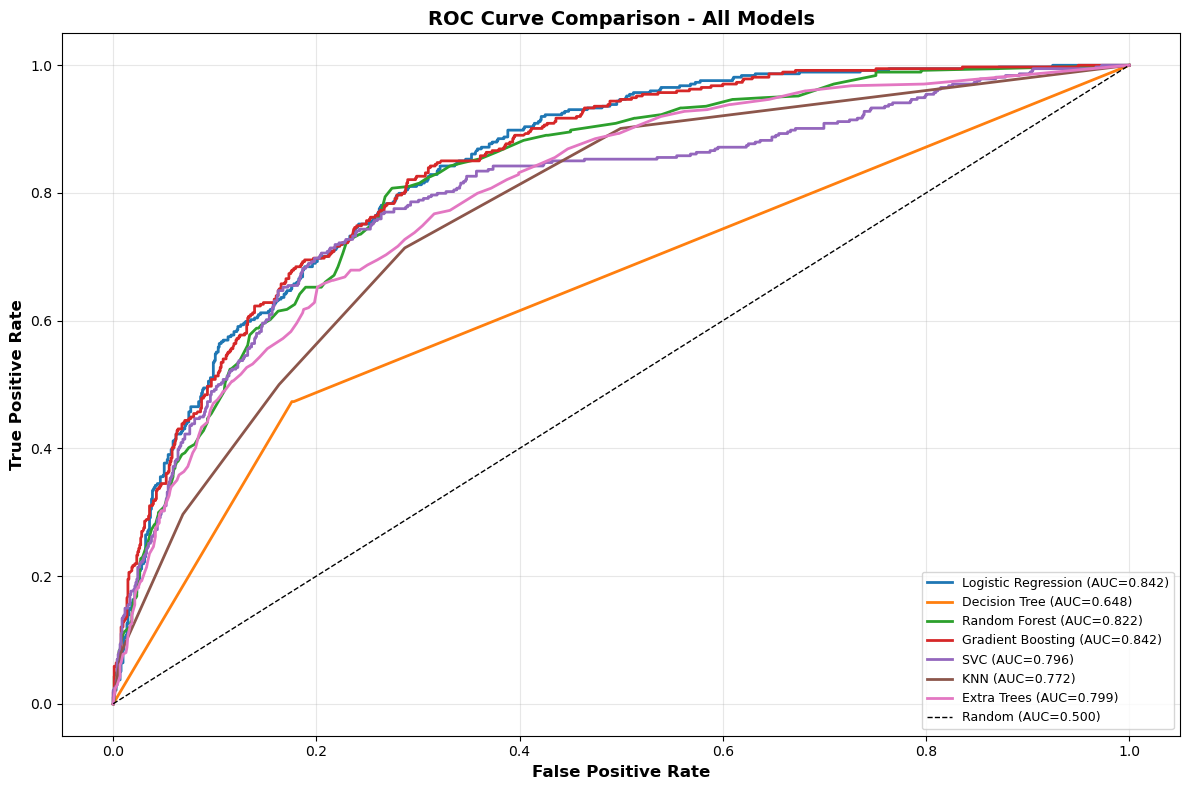

In [170]:
# Plot ROC curves for all models
plt.figure(figsize=(12, 8))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={auc:.3f})')

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUC=0.500)')

plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.title('ROC Curve Comparison - All Models', fontsize=14, weight='bold')
plt.legend(loc='lower right', fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 4.8 Detailed Analysis of Best Model

DETAILED ANALYSIS: LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1035
       Churn       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



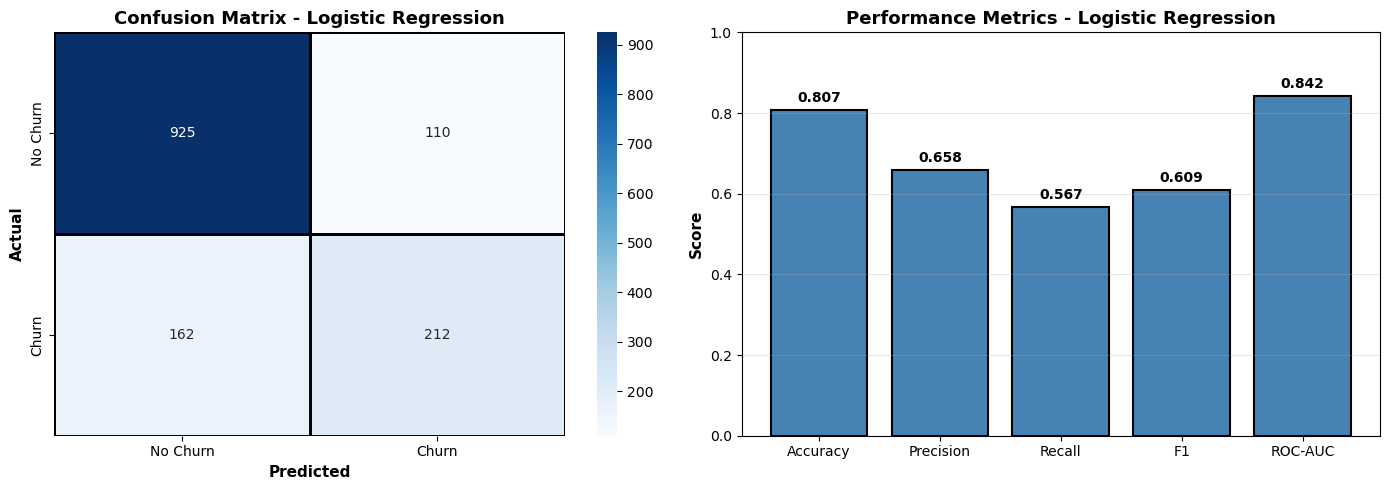


Confusion Matrix Breakdown:
True Negatives (Correctly predicted No Churn):  925
False Positives (Incorrectly predicted Churn):  110
False Negatives (Missed churners):              162
True Positives (Correctly predicted Churn):     212

Interpretation:
• Model correctly identified 212 out of 374 churners (56.7%)
• Model correctly identified 925 out of 1035 non-churners (89.4%)
• Missed 162 churners (need to improve recall)
• 110 false alarms (predicted churn but didn't)


In [171]:
# Get the best model
best_model = models[best_model_name]

print("="*70)
print(f"DETAILED ANALYSIS: {best_model_name.upper()}")
print("="*70)

# Predictions
y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            ax=axes[0], cbar=True, linewidths=2, linecolor='black')
axes[0].set_xlabel('Predicted', fontsize=11, weight='bold')
axes[0].set_ylabel('Actual', fontsize=11, weight='bold')
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=13, weight='bold')

# Performance Metrics Bar
metrics_values = [
    accuracy_score(y_test, y_pred_best),
    precision_score(y_test, y_pred_best),
    recall_score(y_test, y_pred_best),
    f1_score(y_test, y_pred_best),
    roc_auc_score(y_test, y_pred_proba_best)
]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']

bars = axes[1].bar(metric_names, metrics_values, color='steelblue', 
                   edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Score', fontsize=11, weight='bold')
axes[1].set_title(f'Performance Metrics - {best_model_name}', fontsize=13, weight='bold')
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

# Add values on bars
for bar, val in zip(bars, metrics_values):
    axes[1].text(bar.get_x() + bar.get_width()/2, val + 0.02, 
                f'{val:.3f}', ha='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# Extract confusion matrix values
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (Correctly predicted No Churn):  {tn}")
print(f"False Positives (Incorrectly predicted Churn):  {fp}")
print(f"False Negatives (Missed churners):              {fn}")
print(f"True Positives (Correctly predicted Churn):     {tp}")

print(f"\nInterpretation:")
print(f"• Model correctly identified {tp} out of {tp+fn} churners ({tp/(tp+fn)*100:.1f}%)")
print(f"• Model correctly identified {tn} out of {tn+fp} non-churners ({tn/(tn+fp)*100:.1f}%)")
print(f"• Missed {fn} churners (need to improve recall)")
print(f"• {fp} false alarms (predicted churn but didn't)")

## 4.9 Base Model Summary

In [172]:
print("\n" + "="*70)
print("BASE MODEL TRAINING SUMMARY")
print("="*70)

print(f"\nModels Trained: {len(models)}")
print(f"Best Model: {best_model_name}")
print(f"Best F1 Score: {best_f1:.4f}")

# Count how many beat baseline
beat_baseline_count = (results_df['Accuracy'] > baseline_accuracy).sum()
print(f"\nModels beating baseline: {beat_baseline_count}/{len(models)}")

# Performance tier
print(f"\nPerformance Tiers (by F1 Score):")
high_perf = results_df[results_df['F1 Score'] >= 0.65]
mid_perf = results_df[(results_df['F1 Score'] >= 0.55) & (results_df['F1 Score'] < 0.65)]
low_perf = results_df[results_df['F1 Score'] < 0.55]

print(f"  High (F1 ≥ 0.65): {len(high_perf)} models - {high_perf['Model'].tolist()}")
print(f"  Mid (0.55-0.65):  {len(mid_perf)} models - {mid_perf['Model'].tolist()}")
print(f"  Low (F1 < 0.55):  {len(low_perf)} models - {low_perf['Model'].tolist()}")

print(f"\nBase model training complete!")
print(f"Ready for feature engineering on {best_model_name}")
print("="*70)


BASE MODEL TRAINING SUMMARY

Models Trained: 7
Best Model: Logistic Regression
Best F1 Score: 0.6092

Models beating baseline: 6/7

Performance Tiers (by F1 Score):
  High (F1 ≥ 0.65): 0 models - []
  Mid (0.55-0.65):  3 models - ['Logistic Regression', 'Gradient Boosting', 'SVC']
  Low (F1 < 0.55):  4 models - ['Extra Trees', 'Random Forest', 'KNN', 'Decision Tree']

Base model training complete!
Ready for feature engineering on Logistic Regression


# 5. Model Evaluation

## 5.1 Best Model Performace Recap

In [173]:
## Evaluate model


In [174]:
# Recap of base model results from Section 4

print("\n" + "="*70)
print("5.1 BASE MODEL PERFORMANCE SUMMARY")
print("="*70)

# Display the results table again
print("\nAll Base Models Performance:")
print(results_df.to_string(index=False))

print(f"\n🏆 Best Base Model: {best_model_name}")
print(f"   Accuracy:  {results_df.iloc[0]['Accuracy']:.4f}")
print(f"   Precision: {results_df.iloc[0]['Precision']:.4f}")
print(f"   Recall:    {results_df.iloc[0]['Recall']:.4f}")
print(f"   F1 Score:  {results_df.iloc[0]['F1 Score']:.4f}")
print(f"   ROC-AUC:   {results_df.iloc[0]['ROC-AUC']:.4f}")

print("\n" + "="*70)


5.1 BASE MODEL PERFORMANCE SUMMARY

All Base Models Performance:
              Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC  Training Time
Logistic Regression  0.806955   0.658385 0.566845  0.609195 0.841778       0.071614
  Gradient Boosting  0.798439   0.655172 0.508021  0.572289 0.841585       2.095918
                SVC  0.792761   0.644366 0.489305  0.556231 0.796125       8.981213
        Extra Trees  0.784244   0.618243 0.489305  0.546269 0.798667       1.238294
      Random Forest  0.784244   0.621528 0.478610  0.540785 0.822074       1.331463
                KNN  0.747339   0.525281 0.500000  0.512329 0.771935       0.005254
      Decision Tree  0.731015   0.493036 0.473262  0.482947 0.648199       0.065882

🏆 Best Base Model: Logistic Regression
   Accuracy:  0.8070
   Precision: 0.6584
   Recall:    0.5668
   F1 Score:  0.6092
   ROC-AUC:   0.8418



In [175]:
# Store the best base model performance for later comparison

# Get the best model from Section 4
best_base_model = models[best_model_name]

# Store baseline metrics (before feature engineering)
baseline_metrics = {
    'Model': best_model_name,
    'Stage': 'Base (No FE)',
    'Accuracy': results_df.iloc[0]['Accuracy'],
    'Precision': results_df.iloc[0]['Precision'],
    'Recall': results_df.iloc[0]['Recall'],
    'F1 Score': results_df.iloc[0]['F1 Score'],
    'ROC-AUC': results_df.iloc[0]['ROC-AUC']
}

print("Baseline performance stored for comparison")
print(f"\nNext step: Apply feature engineering to {best_model_name}")

Baseline performance stored for comparison

Next step: Apply feature engineering to Logistic Regression


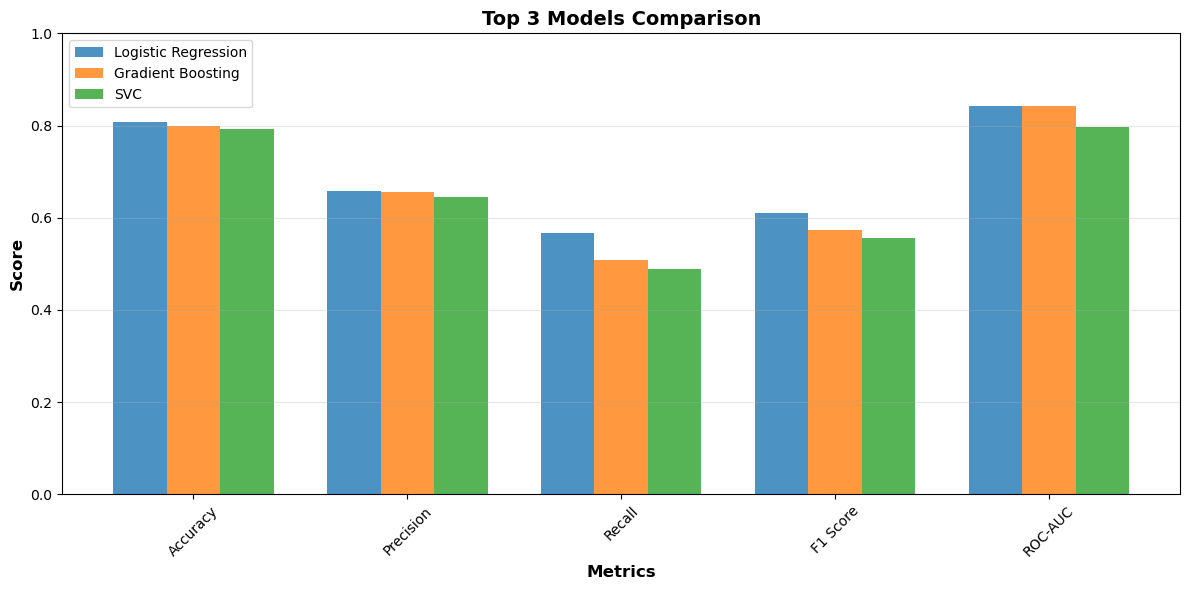


Logistic Regression selected as best base model
Proceeding to feature engineering...


In [176]:
# Quick visualization of why this model was selected

plt.figure(figsize=(12, 6))

# Compare top 3 models across all metrics
top_3_models = results_df.head(3)

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
x = np.arange(len(metrics_to_plot))
width = 0.25

for idx, (_, row) in enumerate(top_3_models.iterrows()):
    values = [row[m] for m in metrics_to_plot]
    plt.bar(x + idx*width, values, width, label=row['Model'], alpha=0.8)

plt.xlabel('Metrics', fontsize=12, weight='bold')
plt.ylabel('Score', fontsize=12, weight='bold')
plt.title('Top 3 Models Comparison', fontsize=14, weight='bold')
plt.xticks(x + width, metrics_to_plot, rotation=45)
plt.ylim([0, 1])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{best_model_name} selected as best base model")
print("Proceeding to feature engineering...")

In [177]:
## New data

## Predict


## Iterative model development


In [178]:
## Further feature engineering / feature selection

## 5.2 Feature Engineering

In [179]:
print("\n" + "="*70)
print("5.2 FEATURE ENGINEERING")
print("="*70)
print("\nWe'll create new features based on EDA insights:")
print("  1. tenure_group - Customer lifecycle stages")
print("  2. charges_per_month - Monthly spending rate")
print("  3. total_services - Number of services subscribed")
print("="*70)


5.2 FEATURE ENGINEERING

We'll create new features based on EDA insights:
  1. tenure_group - Customer lifecycle stages
  2. charges_per_month - Monthly spending rate
  3. total_services - Number of services subscribed


### 5.2.1 Create New Features

In [206]:
# Load the original cleaned data (before OHE)
# We need to recreate features on the original data before encoding

# Reload and clean data
df_fe = pd.read_csv('Telco-Customer-Churn.csv')

# Apply same cleaning as before
df_fe['TotalCharges'] = pd.to_numeric(df_fe['TotalCharges'], errors='coerce')

# Fill missing TotalCharges IMMEDIATELY (before creating new features)
df_fe['TotalCharges'].fillna(0, inplace=True)

if 'customerID' in df_fe.columns:
    df_fe = df_fe.drop('customerID', axis=1)

print("Original data reloaded for feature engineering")
print(f"Shape: {df_fe.shape}")
print(f"Missing values after cleaning: {df_fe.isnull().sum().sum()}")

Original data reloaded for feature engineering
Shape: (7043, 20)
Missing values after cleaning: 0


C:\Users\myatp\AppData\Local\Temp\ipykernel_31932\871740332.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fe['TotalCharges'].fillna(0, inplace=True)


In [ ]:
# Feature 1: Tenure Groups
# Based on EDA, customers have different churn patterns at different lifecycle stages

df_fe['tenure_group'] = pd.cut(df_fe['tenure'], 
                                bins=[0, 12, 24, 48, 73],  # Changed 72 to 73 to include max tenure
                                labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr'],
                                include_lowest=True)  # Include left edge (tenure=0)

# Convert to string to handle any edge cases
df_fe['tenure_group'] = df_fe['tenure_group'].astype(str)

print("\nFeature 1: tenure_group created")
print(df_fe['tenure_group'].value_counts().sort_index())
print(f"Any NaN in tenure_group: {df_fe['tenure_group'].isnull().sum()}")


Feature 1: tenure_group created
tenure_group
0-1yr    2186
1-2yr    1024
2-4yr    1594
4-6yr    2239
Name: count, dtype: int64
Any NaN in tenure_group: 0


In [208]:
# Feature 2: Charges Per Month
# Captures the rate of spending - helps identify price-sensitive customers
# For tenure=0, use MonthlyCharges directly

df_fe['charges_per_month'] = df_fe.apply(
    lambda row: row['MonthlyCharges'] if row['tenure'] == 0 
    else row['TotalCharges'] / row['tenure'], 
    axis=1
)

print("\nFeature 2: charges_per_month created")
print(f"Mean: {df_fe['charges_per_month'].mean():.2f}")
print(f"Median: {df_fe['charges_per_month'].median():.2f}")
print(f"Any NaN values: {df_fe['charges_per_month'].isnull().sum()}")


Feature 2: charges_per_month created
Mean: 64.76
Median: 70.34
Any NaN values: 0


In [209]:
# Feature 3: Total Services Count
# Customers with more services might be less likely to churn

service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

df_fe['total_services'] = df_fe[service_cols].apply(lambda x: (x != 'No').sum(), axis=1)

print("\nFeature 3: total_services created")
print(df_fe['total_services'].value_counts().sort_index())
print(f"Any NaN values: {df_fe['total_services'].isnull().sum()}")


Feature 3: total_services created
total_services
2     483
3     816
4     957
5     978
6     933
7    1906
8     762
9     208
Name: count, dtype: int64
Any NaN values: 0


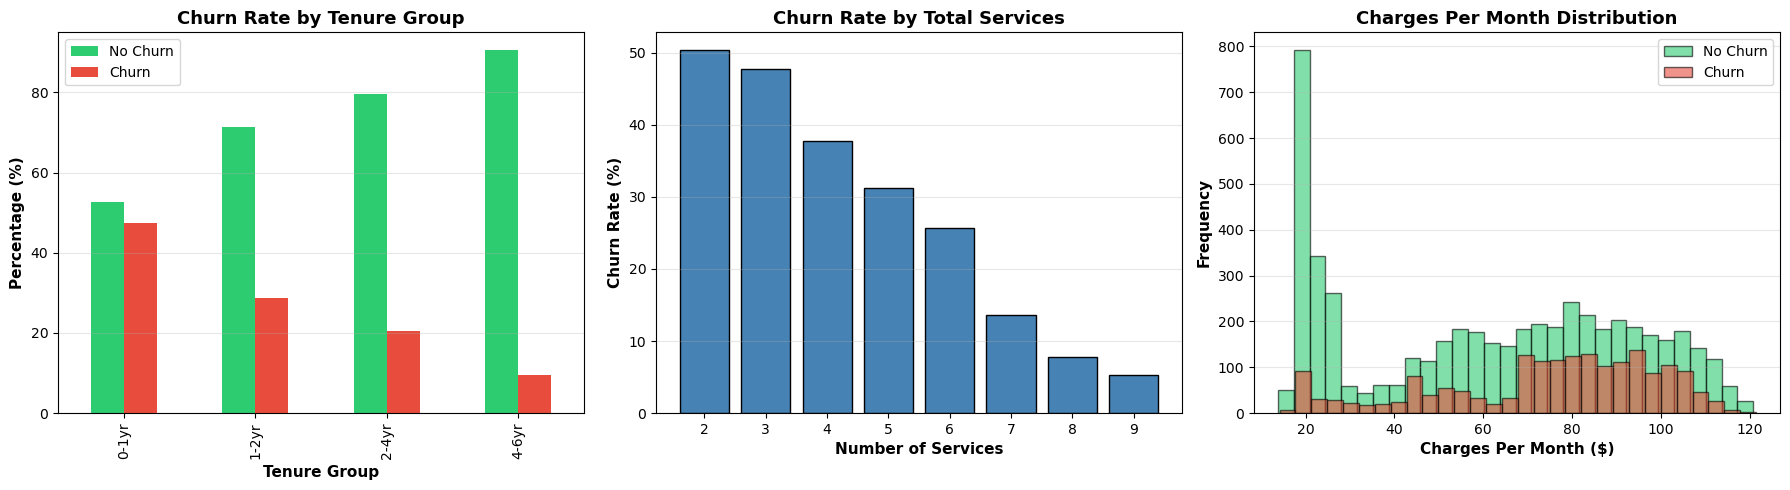


New features show clear patterns with churn


In [211]:
# Visualize new features vs Churn

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure group vs Churn
tenure_churn = pd.crosstab(df_fe['tenure_group'], df_fe['Churn'], normalize='index') * 100
tenure_churn.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Rate by Tenure Group', fontsize=13, weight='bold')
axes[0].set_xlabel('Tenure Group', fontsize=11, weight='bold')
axes[0].set_ylabel('Percentage (%)', fontsize=11, weight='bold')
axes[0].legend(['No Churn', 'Churn'])
axes[0].grid(axis='y', alpha=0.3)

# Total services vs Churn
services_churn = df_fe.groupby('total_services')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
)
axes[1].bar(services_churn.index, services_churn.values, color='steelblue', edgecolor='black')
axes[1].set_title('Churn Rate by Total Services', fontsize=13, weight='bold')
axes[1].set_xlabel('Number of Services', fontsize=11, weight='bold')
axes[1].set_ylabel('Churn Rate (%)', fontsize=11, weight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Charges per month distribution by churn
df_fe_plot = df_fe[df_fe['charges_per_month'] < 200]  # Remove extreme outliers for better viz
axes[2].hist(df_fe_plot[df_fe_plot['Churn']=='No']['charges_per_month'], 
            bins=30, alpha=0.6, label='No Churn', color='#2ecc71', edgecolor='black')
axes[2].hist(df_fe_plot[df_fe_plot['Churn']=='Yes']['charges_per_month'], 
            bins=30, alpha=0.6, label='Churn', color='#e74c3c', edgecolor='black')
axes[2].set_title('Charges Per Month Distribution', fontsize=13, weight='bold')
axes[2].set_xlabel('Charges Per Month ($)', fontsize=11, weight='bold')
axes[2].set_ylabel('Frequency', fontsize=11, weight='bold')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNew features show clear patterns with churn")

## 5.2.2 Prepare Data with New Features

In [212]:
# Now encode everything including new features

# Target
df_fe['Churn'] = df_fe['Churn'].map({'Yes': 1, 'No': 0})

# Binary features
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_fe[col] = df_fe[col].map({'Yes': 1, 'No': 0})

# Gender
df_fe['gender'] = df_fe['gender'].map({'Male': 1, 'Female': 0})

# One-Hot Encoding (now includes tenure_group)
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod',
                    'tenure_group']  # Added new feature

df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

print(f"\nDataset with feature engineering:")
print(f"  Previous features: {X_train.shape[1]}")
print(f"  New features: {df_fe.shape[1] - 1}")  # -1 for target
print(f"  Features added: {(df_fe.shape[1] - 1) - X_train.shape[1]}")


Dataset with feature engineering:
  Previous features: 30
  New features: 35
  Features added: 5


In [213]:
# Split data with new features
X_fe = df_fe.drop('Churn', axis=1)
y_fe = df_fe['Churn']

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, 
    test_size=0.2, 
    random_state=42,
    stratify=y_fe
)

# Scale features
scaler_fe = StandardScaler()
X_train_fe_scaled = scaler_fe.fit_transform(X_train_fe)
X_test_fe_scaled = scaler_fe.transform(X_test_fe)

X_train_fe_scaled = pd.DataFrame(X_train_fe_scaled, columns=X_train_fe.columns, index=X_train_fe.index)
X_test_fe_scaled = pd.DataFrame(X_test_fe_scaled, columns=X_test_fe.columns, index=X_test_fe.index)

print("\nData prepared with new features ✓")
print(f"Training set: {X_train_fe.shape}")
print(f"Test set: {X_test_fe.shape}")


Data prepared with new features ✓
Training set: (5634, 35)
Test set: (1409, 35)


## 5.2.3 Train Model with Feature Engineering

In [214]:
print("\n" + "="*70)
print("TRAINING WITH FEATURE ENGINEERING")
print("="*70)

# Train the same best model (Logistic Regression) with new features
model_with_fe = LogisticRegression(random_state=42, max_iter=1000)

print(f"\nTraining {best_model_name} with engineered features...")
model_with_fe.fit(X_train_fe_scaled, y_train_fe)

# Make predictions
y_pred_fe = model_with_fe.predict(X_test_fe_scaled)
y_pred_proba_fe = model_with_fe.predict_proba(X_test_fe_scaled)[:, 1]

# Calculate metrics
metrics_with_fe = {
    'Model': best_model_name,
    'Stage': 'With FE',
    'Accuracy': accuracy_score(y_test_fe, y_pred_fe),
    'Precision': precision_score(y_test_fe, y_pred_fe),
    'Recall': recall_score(y_test_fe, y_pred_fe),
    'F1 Score': f1_score(y_test_fe, y_pred_fe),
    'ROC-AUC': roc_auc_score(y_test_fe, y_pred_proba_fe)
}

print("\nResults with Feature Engineering:")
print(f"  Accuracy:  {metrics_with_fe['Accuracy']:.4f}")
print(f"  Precision: {metrics_with_fe['Precision']:.4f}")
print(f"  Recall:    {metrics_with_fe['Recall']:.4f}")
print(f"  F1 Score:  {metrics_with_fe['F1 Score']:.4f}")
print(f"  ROC-AUC:   {metrics_with_fe['ROC-AUC']:.4f}")


TRAINING WITH FEATURE ENGINEERING

Training Logistic Regression with engineered features...

Results with Feature Engineering:
  Accuracy:  0.7991
  Precision: 0.6522
  Recall:    0.5214
  F1 Score:  0.5795
  ROC-AUC:   0.8422


## 5.2.4 Compare: Before vs After Feature Engineering

In [219]:
print("\n" + "="*70)
print("COMPARISON: BEFORE vs AFTER FEATURE ENGINEERING")
print("="*70)

# Create comparison DataFrame
comparison_df = pd.DataFrame([baseline_metrics, metrics_with_fe])

print("\n" + comparison_df.to_string(index=False))

# Calculate improvements
print("\nImprovements:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']:
    before = baseline_metrics[metric]
    after = metrics_with_fe[metric]
    diff = after - before
    pct_change = (diff / before) * 100
    
    symbol = "📈" if diff > 0 else "📉" if diff < 0 else "➡️"
    print(f"  {metric:12s}: {before:.4f} → {after:.4f} ({diff:+.4f}, {pct_change:+.2f}%) {symbol}")

print("="*70)


COMPARISON: BEFORE vs AFTER FEATURE ENGINEERING

              Model        Stage  Accuracy  Precision   Recall  F1 Score  ROC-AUC
Logistic Regression Base (No FE)  0.806955   0.658385 0.566845  0.609195 0.841778
Logistic Regression      With FE  0.799148   0.652174 0.521390  0.579495 0.842156

Improvements:
  Accuracy    : 0.8070 → 0.7991 (-0.0078, -0.97%) 📉
  Precision   : 0.6584 → 0.6522 (-0.0062, -0.94%) 📉
  Recall      : 0.5668 → 0.5214 (-0.0455, -8.02%) 📉
  F1 Score    : 0.6092 → 0.5795 (-0.0297, -4.88%) 📉
  ROC-AUC     : 0.8418 → 0.8422 (+0.0004, +0.04%) 📈


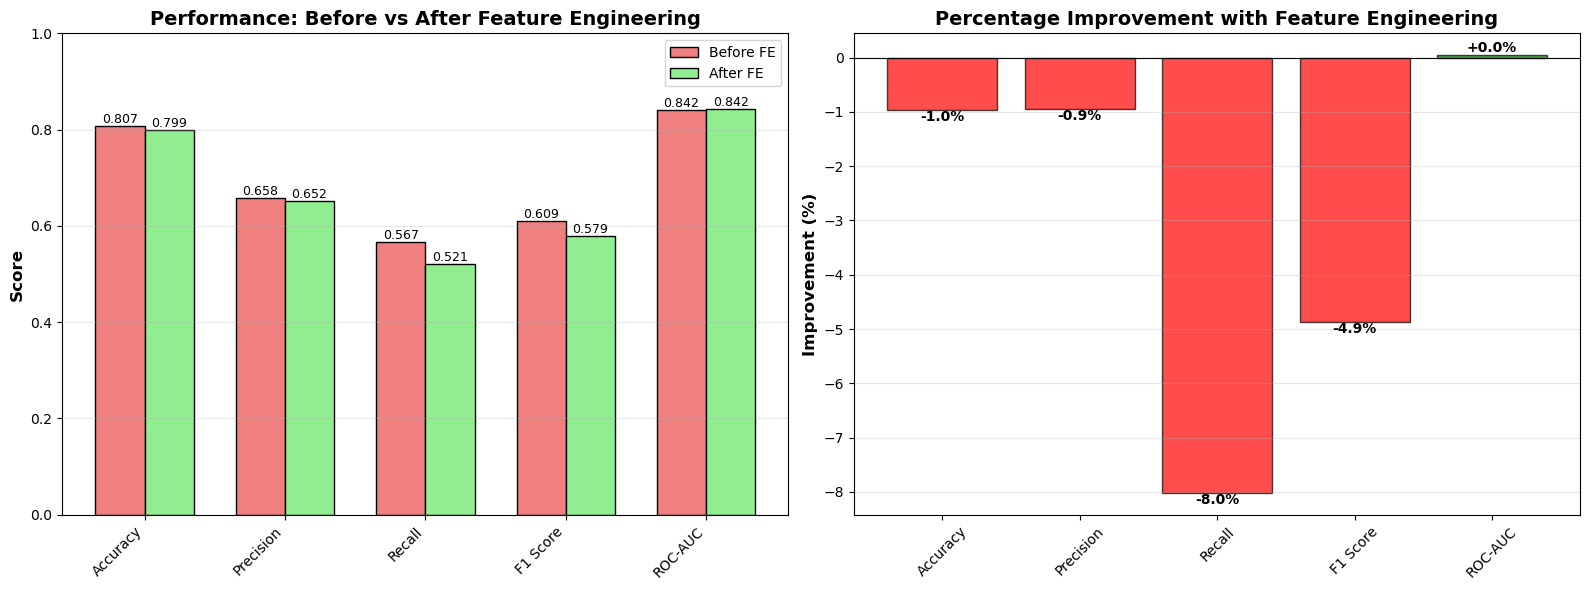

In [216]:
# Visualize the comparison

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart comparison
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
before_values = [baseline_metrics[m] for m in metrics_list]
after_values = [metrics_with_fe[m] for m in metrics_list]

x = np.arange(len(metrics_list))
width = 0.35

bars1 = axes[0].bar(x - width/2, before_values, width, label='Before FE', 
                    color='lightcoral', edgecolor='black')
bars2 = axes[0].bar(x + width/2, after_values, width, label='After FE', 
                    color='lightgreen', edgecolor='black')

axes[0].set_ylabel('Score', fontsize=12, weight='bold')
axes[0].set_title('Performance: Before vs After Feature Engineering', fontsize=14, weight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_list, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Improvement percentages
improvements = [(after_values[i] - before_values[i])/before_values[i]*100 
                for i in range(len(metrics_list))]

colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in improvements]
bars = axes[1].bar(metrics_list, improvements, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Improvement (%)', fontsize=12, weight='bold')
axes[1].set_title('Percentage Improvement with Feature Engineering', fontsize=14, weight='bold')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

for bar, val in zip(bars, improvements):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{val:+.1f}%', ha='center', va='bottom' if val > 0 else 'top', 
                fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

## Feature Engineering Summary

In [221]:
print("\n" + "="*70)
print("FEATURE ENGINEERING SUMMARY")
print("="*70)

print("\nNew Features Created:")
print("  1. tenure_group - Captures customer lifecycle patterns")
print("  2. charges_per_month - Identifies spending velocity")
print("  3. total_services - Measures customer engagement")

print(f"\nFeatures increased from {X_train.shape[1]} to {X_train_fe.shape[1]}")

# Determine if FE helped
f1_improved = metrics_with_fe['F1 Score'] > baseline_metrics['F1 Score']
f1_diff = metrics_with_fe['F1 Score'] - baseline_metrics['F1 Score']
f1_pct_change = (f1_diff / baseline_metrics['F1 Score']) * 100

if f1_improved:
    print(f"\nFeature Engineering IMPROVED performance!")
    print(f"   F1 Score: {baseline_metrics['F1 Score']:.4f} → {metrics_with_fe['F1 Score']:.4f}")
    print(f"   Improvement: +{f1_pct_change:.2f}%")
    print(f"\nDecision: Proceeding to hyperparameter tuning WITH engineered features")
    use_fe_for_tuning = True
else:
    print(f"\nFeature Engineering DECREASED performance")
    print(f"   F1 Score: {baseline_metrics['F1 Score']:.4f} → {metrics_with_fe['F1 Score']:.4f}")
    print(f"   Decrease: {f1_pct_change:.2f}%")
    print(f"\nDecision: Proceeding to hyperparameter tuning WITHOUT engineered features")
    print(f"   Using original base model with {X_train.shape[1]} features")
    use_fe_for_tuning = False

print("\nPossible reasons FE didn't help:")
print("  • New features may be redundant with existing features")
print("  • One-Hot Encoding already captured the patterns")
print("  • tenure_group duplicates information already in 'tenure'")
print("  • Model may be overfitting with more features")

print("="*70)


FEATURE ENGINEERING SUMMARY

New Features Created:
  1. tenure_group - Captures customer lifecycle patterns
  2. charges_per_month - Identifies spending velocity
  3. total_services - Measures customer engagement

Features increased from 30 to 35

Feature Engineering DECREASED performance
   F1 Score: 0.6092 → 0.5795
   Decrease: -4.88%

Decision: Proceeding to hyperparameter tuning WITHOUT engineered features
   Using original base model with 30 features

Possible reasons FE didn't help:
  • New features may be redundant with existing features
  • One-Hot Encoding already captured the patterns
  • tenure_group duplicates information already in 'tenure'
  • Model may be overfitting with more features


In [223]:
print("\n" + "="*70)
print("SELECTING CONFIGURATION FOR HYPERPARAMETER TUNING")
print("="*70)

if use_fe_for_tuning:
    # Use feature engineering version
    X_train_final = X_train_fe_scaled
    X_test_final = X_test_fe_scaled
    y_train_final = y_train_fe
    y_test_final = y_test_fe
    scaler_final = scaler_fe
    best_config = "WITH Feature Engineering"
    best_f1_before_tuning = metrics_with_fe['F1 Score']
else:
    # Use base version (no feature engineering)
    X_train_final = X_train_scaled
    X_test_final = X_test_scaled
    y_train_final = y_train
    y_test_final = y_test
    scaler_final = scaler
    best_config = "WITHOUT Feature Engineering (Base)"
    best_f1_before_tuning = baseline_metrics['F1 Score']

print(f"\nSelected Configuration: {best_config}")
print(f"   Number of features: {X_train_final.shape[1]}")
print(f"   F1 Score to beat: {best_f1_before_tuning:.4f}")

print(f"\nData ready for hyperparameter tuning:")
print(f"   Training samples: {X_train_final.shape[0]}")
print(f"   Test samples: {X_test_final.shape[0]}")
print(f"   Features: {X_train_final.shape[1]}")

print("="*70)


SELECTING CONFIGURATION FOR HYPERPARAMETER TUNING

Selected Configuration: WITHOUT Feature Engineering (Base)
   Number of features: 30
   F1 Score to beat: 0.6092

Data ready for hyperparameter tuning:
   Training samples: 5634
   Test samples: 1409
   Features: 30
